<a href="https://colab.research.google.com/github/EduardoAngelo2803/Eda-WorldStocksPrices/blob/main/edaWSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tratamento de Dados

In [ ]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import warnings
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_oficial = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/World-Stock-Prices-Dataset.csv', sep = ',')

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/World-Stock-Prices-Dataset.csv', sep = ',')


In [ ]:
df.head(10)

Date        Open        High         Low       Close  \
0  2023-09-08 00:00:00-04:00    5.770000    5.840000    5.390000    5.450000   
1  2023-09-08 00:00:00-04:00  443.559998  446.809998  438.850006  442.799988   
2  2023-09-08 00:00:00-04:00  549.070007  552.379883  548.217590  551.190002   
3  2023-09-08 00:00:00-04:00  136.860001  138.851898  136.751999  138.229996   
4  2023-09-08 00:00:00-04:00  178.350006  180.238998  177.789993  178.179993   
5  2023-09-08 00:00:00-04:00   98.099998   98.099998   97.277496   97.669998   
6  2023-09-08 00:00:00-04:00  124.360001  124.732498  122.530899  123.690002   
7  2023-09-08 00:00:00-04:00  134.910004  136.649994  134.850006  136.380005   
8  2023-09-08 00:00:00-04:00  159.830002  161.190002  154.400101  155.470001   
9  2023-09-08 00:00:00-04:00   73.680000   73.800003   71.639999   72.059998   

       Volume  Dividends  Stock Splits                 Brand_Name Ticker  \
0  14798327.0        0.0           0.0                    peloton   PTON   
1   2704353.0        0.0           0.0                    netflix   NFLX   
2   1077496.0        0.0           0.0                     costco   COST   
3  38365929.0        0.0           0.0                     amazon   AMZN   
4  65602066.0        0.0           0.0                      apple   AAPL   
5   6435533.0        0.0           0.0                       nike    NKE   
6   2923526.0        0.0           0.0                     target    TGT   
7  23584188.0        0.0           0.0                     google  GOOGL   
8   1713575.0        0.0           0.0                    spotify   SPOT   
9   3885348.0        0.0           0.0  zoom video communications     ZM   

    Industry_Tag Country  
0        fitness     usa  
1  entertainment     usa  
2         retail     usa  
3     e-commerce     usa  
4     technology     usa  
5        apparel     usa  
6         retail     usa  
7     technology     usa  
8          music     usa  
9     technology     usa

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279226 entries, 0 to 279225
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          279226 non-null  object 
 1   Open          279226 non-null  float64
 2   High          279226 non-null  float64
 3   Low           279226 non-null  float64
 4   Close         279226 non-null  float64
 5   Volume        279226 non-null  float64
 6   Dividends     279226 non-null  float64
 7   Stock Splits  279226 non-null  float64
 8   Brand_Name    279226 non-null  object 
 9   Ticker        279226 non-null  object 
 10  Industry_Tag  279226 non-null  object 
 11  Country       279226 non-null  object 
dtypes: float64(7), object(5)
memory usage: 25.6+ MB


<Axes: >

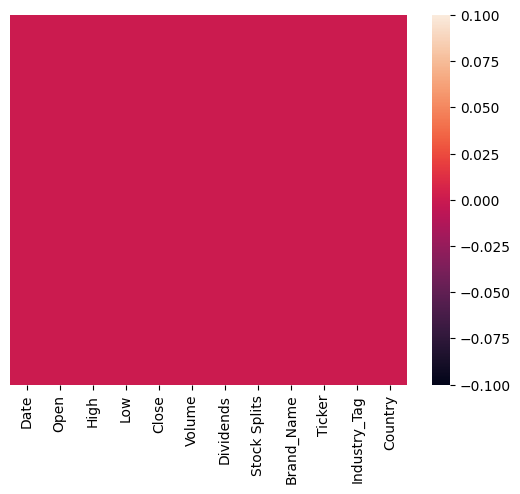

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False)

In [ ]:
Country = df['Country']

elementos_unicos = df['Country'].unique()

print(elementos_unicos)


contagem_nulos = df.isnull().sum()
#Não temos elementos Nulos
print(contagem_nulos)

quantidade_de_linhas = len(df)
print(quantidade_de_linhas)

['usa' 'japan' 'germany' 'switzerland' 'canada' 'netherlands' 'france']
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
dtype: int64
279226


In [ ]:
#Porcentagem dos EUA, e dos outros Países em relação a base inteira



In [ ]:
contagem_elementos = df['Country'].value_counts().to_dict()

# Se você tiver apenas os 7 elementos únicos e deseja contar suas frequências, você pode fazer assim:
elementos_unicos = ['usa', 'japan', 'germany', 'switzerland', 'canada', 'netherlands', 'france']
contagem_elementos_desejados = {elemento: contagem_elementos.get(elemento, 0) for elemento in elementos_unicos}

print(contagem_elementos_desejados)

{'usa': 219272, 'japan': 17880, 'germany': 14233, 'switzerland': 5960, 'canada': 2092, 'netherlands': 11920, 'france': 7869}


In [ ]:
Ticker = df['Ticker'].unique()

print(Ticker)


['PTON' 'NFLX' 'COST' 'AMZN' 'AAPL' 'NKE' 'TGT' 'GOOGL' 'SPOT' 'ZM' 'DIS'
 'RBLX' 'NTDOY' 'DAL' 'MSFT' 'LUV' 'AEO' 'TSLA' 'SBUX' 'NVDA' 'CRM' 'HMC'
 'CL' 'HSY' 'POAHY' 'CMG' 'PINS' 'LOGI' 'SHOP' 'CROX' 'AMD' 'KO' 'ADDYY'
 'AXP' 'V' 'ADBE' 'SQ' 'UL' 'CSCO' 'JPM' 'LVMUY' 'ABNB' 'MAR' 'UBSFY' 'ZI'
 'TM' 'HLT' 'MCD' 'HD' 'MA' 'JNJ' 'UBER' 'PG' 'COIN' 'FDX' 'MMM' 'JWN'
 'PHG' 'FL' 'BAMXF' 'PMMAF']


In [ ]:
df_tech = df[df['Industry_Tag'] == 'technology']

print(df_tech['Brand_Name'].unique())


['apple' 'google' 'zoom video communications' 'microsoft' 'nvidia'
 'salesforce / slack' 'logitech' 'amd' 'adobe' 'cisco' 'zoominfo' 'uber'
 'philips']


In [ ]:
def get_data(df_temp, Brand_Names):

    nameStock = df_temp[df_temp["Brand_Name"].isin(Brand_Names)]
    return nameStock

companies_tech = ["apple", "google", "microsoft", "nvidia","adobe","amazon","spotify"]
df_companies_tech = get_data(df,companies_tech)

df_companies_tech


Date        Open        High         Low  \
3       2023-09-08 00:00:00-04:00  136.860001  138.851898  136.751999   
4       2023-09-08 00:00:00-04:00  178.350006  180.238998  177.789993   
7       2023-09-08 00:00:00-04:00  134.910004  136.649994  134.850006   
8       2023-09-08 00:00:00-04:00  159.830002  161.190002  154.400101   
14      2023-09-08 00:00:00-04:00  330.089996  336.160004  329.459991   
...                           ...         ...         ...         ...   
176022  2023-08-29 00:00:00-04:00  527.700012  541.969971  526.150024   
176023  2023-08-30 00:00:00-04:00  540.099976  546.000000  536.090027   
176024  2023-08-31 00:00:00-04:00  547.000000  562.099976  546.760010   
176025  2023-09-01 00:00:00-04:00  564.799988  569.979980  558.520020   
176026  2023-09-05 00:00:00-04:00  557.880005  567.590027  555.419983   

             Close      Volume  Dividends  Stock Splits Brand_Name Ticker  \
3       138.229996  38365929.0        0.0           0.0     amazon   AMZN   
4       178.179993  65602066.0        0.0           0.0      apple   AAPL   
7       136.380005  23584188.0        0.0           0.0     google  GOOGL   
8       155.470001   1713575.0        0.0           0.0    spotify   SPOT   
14      334.269989  19548165.0        0.0           0.0  microsoft   MSFT   
...            ...         ...        ...           ...        ...    ...   
176022  540.570007   2167000.0        0.0           0.0      adobe   ADBE   
176023  545.359985   1930300.0        0.0           0.0      adobe   ADBE   
176024  559.340027   3919300.0        0.0           0.0      adobe   ADBE   
176025  563.210022   2232300.0        0.0           0.0      adobe   ADBE   
176026  564.880005   2349700.0        0.0           0.0      adobe   ADBE   

       Industry_Tag Country  
3        e-commerce     usa  
4        technology     usa  
7        technology     usa  
8             music     usa  
14       technology     usa  
...             ...     ...  
176022   technology     usa  
176023   technology     usa  
176024   technology     usa  
176025   technology     usa  
176026   technology     usa  

[35968 rows x 12 columns]

In [ ]:
df_companies_tech = df_companies_tech.sort_values('Date')

fig1 = px.line(df_companies_tech, x='Date', y='Close', color='Brand_Name', title='Série temporal das ações de empresas de tecnologia', labels={'Brand_Name': 'Empresa'})
fig1.update_yaxes(title_text='Fechamento')
fig1.update_xaxes(title_text='Data')
fig1.update_coloraxes(colorbar_title='Empresa')

fig1.show()

Média dos preços das ações da apple foi de: 32.68


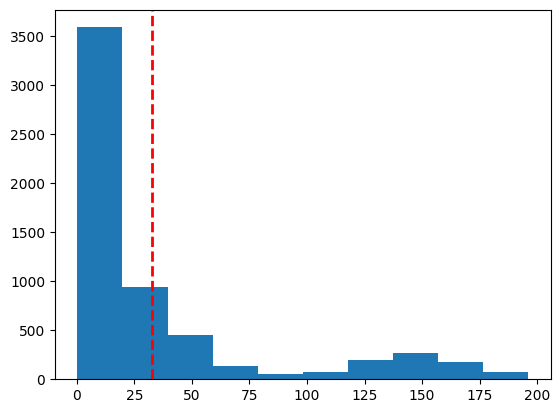

In [ ]:
stock_closed_apple = df_companies_tech[df_companies_tech['Brand_Name'] == 'apple']
mean_apple = stock_closed_apple['Close'].mean()

print(f"Média dos preços das ações da apple foi de: {mean_apple:.2f}")

plt.hist(stock_closed_apple['Close'], label='70%')
plt.axvline(mean_apple, color='r', linestyle='dashed', linewidth=2, label='Média')

Text(0, 0.5, 'Density')

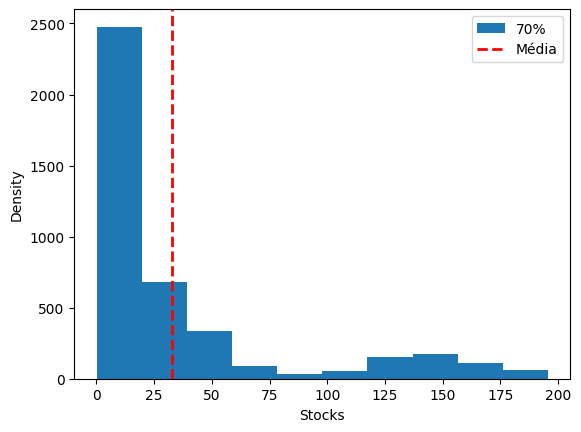

In [ ]:
sample_apple70 = stock_closed_apple.sample(4172)

sample_apple50 = stock_closed_apple.sample(2980)

sample_apple30 = stock_closed_apple.sample(1788)


plt.hist(sample_apple70['Close'], label='70%')
plt.axvline(mean_apple, color='r', linestyle='dashed', linewidth=2, label='Média')

plt.legend()

plt.xlabel('Stocks')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

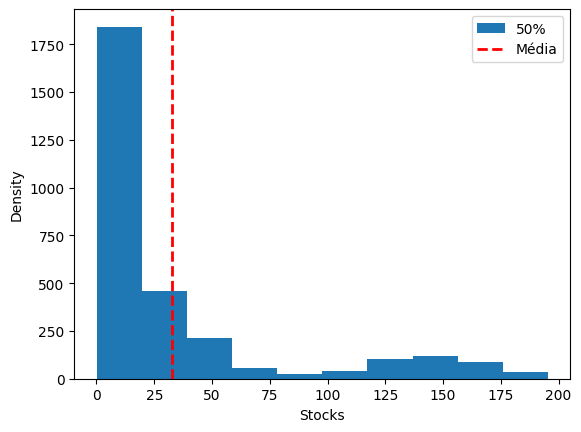

In [ ]:
plt.hist(sample_apple50['Close'], label='50%')
plt.axvline(mean_apple, color='r', linestyle='dashed', linewidth=2, label='Média')
plt.legend()

plt.xlabel('Stocks')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

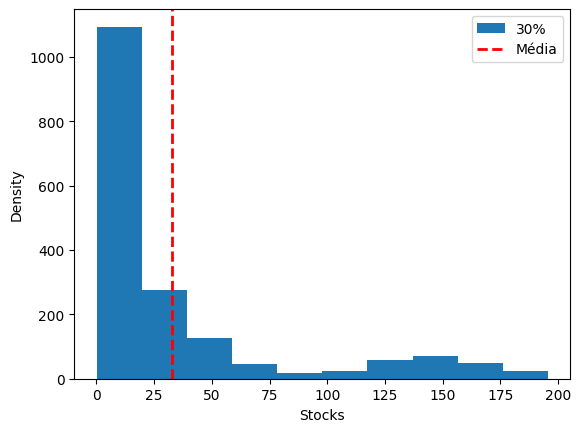

In [ ]:
plt.hist(sample_apple30['Close'], label='30%')
plt.axvline(mean_apple, color='r', linestyle='dashed', linewidth=2, label='Média')
plt.legend()

plt.xlabel('Stocks')
plt.ylabel('Density')

Obtivemos os mesmos resultados da base inteira, como utilizando 30% da base, então, para poupar esforço computacional, iremos continuar com a amostra de 30%.

In [ ]:
total_div = df_companies_tech[df_companies_tech['Brand_Name'] == 'apple']
contador = 0
for count in total_div['Dividends']:
  if count > 0:

    contador +=1

print(contador)

45


# Hipóteses

Hipótese alternativa (Ha) -> A média de preços das ações da Apple é maior que a da Nvidia
Hipótese nula (H0) -> A média de preços das ações da Apple é menor ou igual a da Nvidia

In [ ]:
import statsmodels.api as sm

Data_apple = pd.Series(stock_closed_apple['Close'])
serie_numerica = pd.to_datetime(Data_apple)
print(serie_numerica)
#Precisamos tratar, dando erro
result = sm.tsa.adfuller(Data_apple)


18504   1970-01-01 00:00:00.000000000
18505   1970-01-01 00:00:00.000000000
18506   1970-01-01 00:00:00.000000000
18507   1970-01-01 00:00:00.000000000
18508   1970-01-01 00:00:00.000000000
                     ...             
24459   1970-01-01 00:00:00.000000189
185     1970-01-01 00:00:00.000000182
124     1970-01-01 00:00:00.000000177
4       1970-01-01 00:00:00.000000178
63      1970-01-01 00:00:00.000000178
Name: Close, Length: 5960, dtype: datetime64[ns]


## Teste de Shapiro-Wilk

Para verificar a normalidade das amostras.
Hipótese nula (H0) -> Dados seguem uma distribuição normal

In [ ]:
sample_apple2_30 = stock_closed_apple.sample(1788) # Criando uma segunda amostra

In [ ]:
def check_if_normal(data, alpha=0.05):
  statistic, p_value = stats.shapiro(data)

  res = None
  if p_value < alpha:
    res = False
  else:
    res = True
  return res, statistic, p_value

In [ ]:

def get_shapiro_result(res):

  if res:

    return "Falha em rejeitar a hipótese nula: os dados são normalmente distribuídos"

  return "Hipótese nula rejeitada: os dados da amostra não são normalmente distribuiídos"

Testando para a primeira amostra

Hipótese nula rejeitada: os dados da amostra não são normalmente distribuiídos


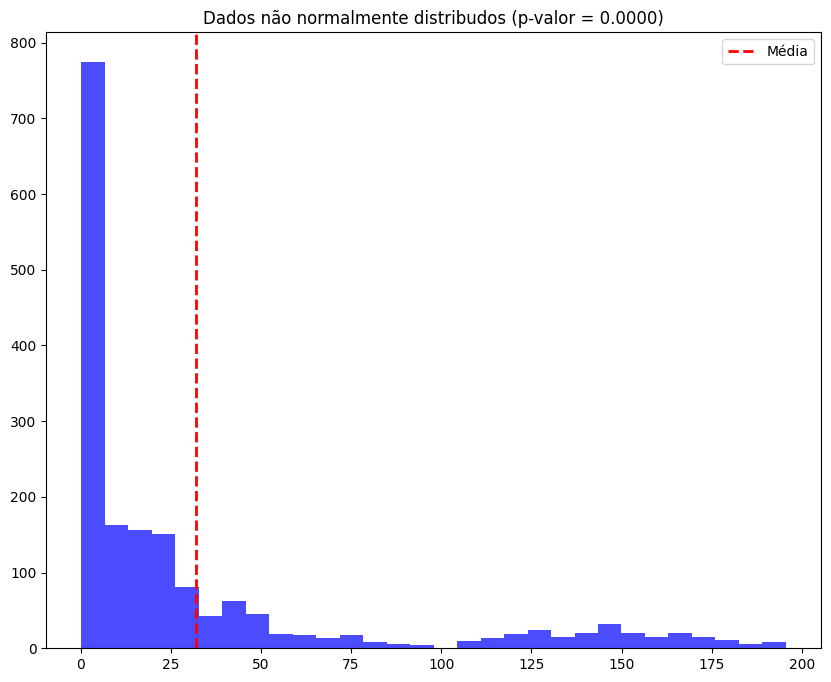

In [ ]:
res, statistic, p_value = check_if_normal(sample_apple30['Close'])
print(get_shapiro_result(res))

fig, ax = plt.subplots(figsize=(10, 8))
shapiro_test_not_normal = stats.shapiro(sample_apple30['Close'])
ax.hist(sample_apple30['Close'], bins=30, color='blue', alpha=0.7)
ax.axvline(x=np.mean(sample_apple30['Close']), color='red', linestyle='dashed', linewidth=2)
ax.set_title(f"Dados não normalmente distribudos (p-valor = {p_value:.4f})")
ax.legend(["Média"])

Testando para segunda amostra

Hipótese nula rejeitada: os dados da amostra não são normalmente distribuiídos
0.0


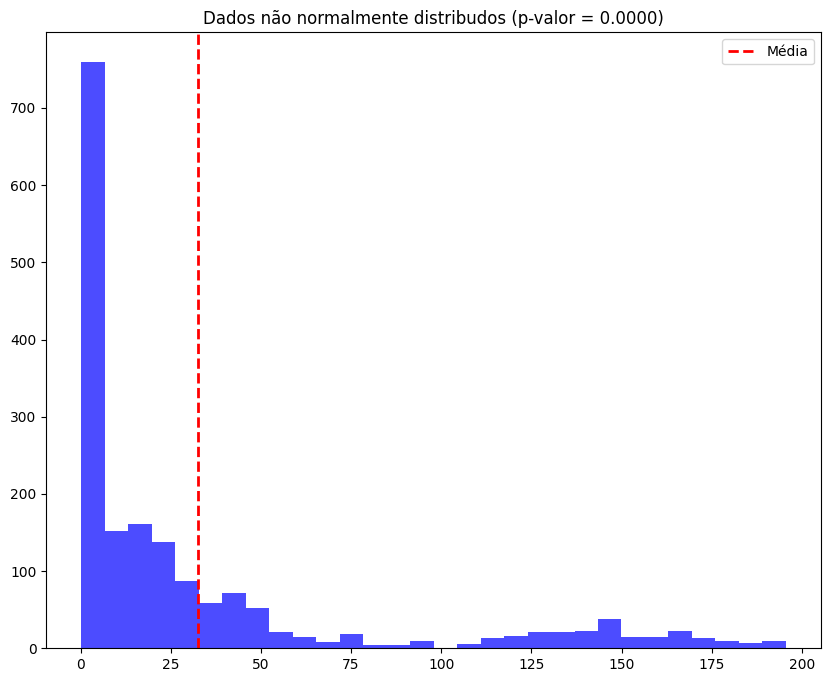

In [ ]:
#num_samples = 100
#cont = 0
#resultados = []
#amostras_rejeitadas = []
#Verificar se é necessário fazer para vários samples

res, statistic, p_value = check_if_normal(sample_apple2_30['Close'])


print(get_shapiro_result(res))
print(p_value)

fig, ax = plt.subplots(figsize=(10, 8))
shapiro_test_not_normal = stats.shapiro(sample_apple2_30['Close'])
ax.hist(sample_apple2_30['Close'], bins=30, color='blue', alpha=0.7)
ax.axvline(x=np.mean(sample_apple2_30['Close']), color='red', linestyle='dashed', linewidth=2)
ax.set_title(f"Dados não normalmente distribudos (p-valor = {p_value:.4f})")
ax.legend(["Média"])
#plt.show()

##Teste de Kolmogorov-Smirnov

Para verificar a equidade de distribuição entre duas amostras

In [ ]:
def check_ks(sample1, sample2, alpha=0.05):
  statistic, p_value = stats.ks_2samp(sample1, sample2)

  res = None
  if p_value < alpha:
    res = False
  else:
    res = True
  return res, statistic, p_value

In [ ]:
def get_ks_result(res):
  if res:
    return "Falha em rejeitar a hipótese nula:\n    Os dados tem distribuições similares"
  return "Hipótese nula rejeitada: os dados da amostra tem distribuições diferentes"

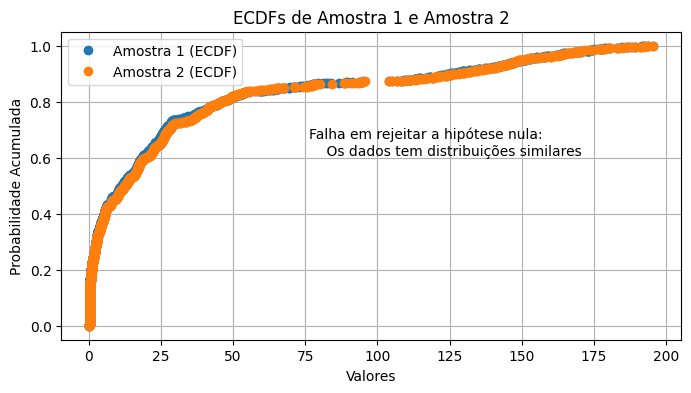

In [ ]:
res, statistic, p_value = check_ks(sample_apple30['Close'], sample_apple2_30['Close'])


# Plote o gráfico
plt.figure(figsize=(8, 4))
plt.plot(np.sort(sample_apple30['Close']), np.arange(1, len(sample_apple30['Close']) + 1) / len(sample_apple30['Close']), marker='o', linestyle='none', label='Amostra 1 (ECDF)')
plt.plot(np.sort(sample_apple2_30['Close']), np.arange(1, len(sample_apple2_30['Close']) + 1) / len(sample_apple2_30['Close']), marker='o', linestyle='none', label='Amostra 2 (ECDF)')

plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada')
plt.title('ECDFs de Amostra 1 e Amostra 2')

# Adicione o resultado do teste no gráfico
result_text = get_ks_result(res)
plt.text(0.4, 0.6, result_text, fontsize=10, transform=plt.gca().transAxes)

plt.legend()
plt.grid(True)
plt.show()

##Teste de Pearson

Para testar a correlação entre duas amostras

stat=0.011, p=0.648
Provavelmente Independentes


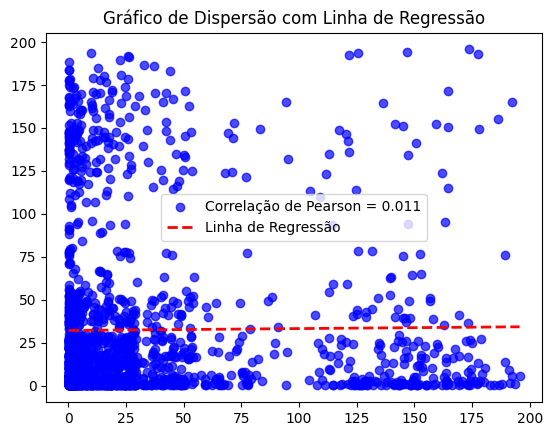

In [ ]:
from scipy.stats import pearsonr

#data1 = amostras do preço de fechamento das ações da apple
#data2 = amostras dos preços de fechamento das ações da google

stocks_google = df_companies_tech[df_companies_tech['Brand_Name'] == 'google']
sample_google30 = stocks_google.sample(1788)

data1 = sample_apple30['Close'].dropna()
data2 = sample_apple2_30['Close'].dropna()

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente Independentes')
else:
	print('Provavelmente Dependentes')

# Cria um gráfico de dispersão
plt.scatter(data1, data2, color='blue', alpha=0.7, label=f'Correlação de Pearson = {stat:.3f}')

# Adiciona uma linha de regressão
plt.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)), color='red', linewidth=2, linestyle='--', label='Linha de Regressão')

# Configura o título e rótulos dos eixos
plt.title('Gráfico de Dispersão com Linha de Regressão')

# Adiciona uma legenda
plt.legend()

# Exibe o gráfico
plt.show()

 ## Extras

Usando Fitter para identificar qual distribuição se adequa aos nosso daos. De modo a verificar se as amostras seguem uma Distribuição Normal, Se pertencem a mesma distribuição e se são Independentes.

In [ ]:
!pip install fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.3 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26054 sha256=e087476e867dd92d680f1b32ab7a44771eb79bcba126eb8c35e1c0e3ce637e04
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built fitter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's depe

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

### Sample 1

In [ ]:
sample2 = Data_apple.sample(1788)

sample2

22871     36.674839
19526      0.343763
24121    156.273270
23228     51.346493
20143      1.605438
            ...    
19987      2.101984
19912      1.315029
24144    150.109756
22072     16.924322
21109      7.831966
Name: Close, Length: 1788, dtype: float64

sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm         0.001222  1339.588778  1356.055337     inf      0.109606   
burr            0.002608  1396.454223  1418.409635     inf      0.147554   
gamma           0.004623  1349.481689  1365.948248     inf      0.107796   
beta            0.007829  1211.733161  1233.688573     inf      0.153785   
norm            0.021290  1268.558314  1279.536020     inf      0.256032   

             ks_pvalue  
lognorm   3.663390e-19  
burr      1.922670e-34  
gamma     1.509706e-18  
beta      2.169936e-37  
norm     7.867862e-104

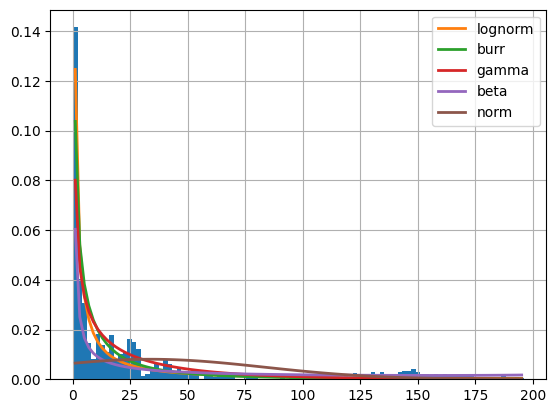

In [ ]:
f = Fitter(sample2,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 2.4081776019250123,
  'loc': 0.19941734181703694,
  'scale': 6.418971517489037}}

### Sample 2

In [ ]:
data1

21454     12.256018
22003     17.433722
23416     49.707722
23003     40.277042
20529      4.110600
            ...    
22507     26.741562
19442      0.322846
24350    160.331421
23717    109.824867
24180    150.496933
Name: Close, Length: 1788, dtype: float64

sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm         0.000934  1343.892879  1360.359438     inf      0.108172   
gamma           0.003778  1348.514559  1364.981118     inf      0.092495   
burr            0.004926  1272.245976  1294.201388     inf      0.081056   
beta            0.007110  1248.793614  1270.749026     inf      0.152867   
norm            0.021057  1292.088653  1303.066359     inf      0.256500   

             ks_pvalue  
lognorm   1.126915e-18  
gamma     9.196975e-14  
burr      1.148712e-10  
beta      5.999220e-37  
norm     3.249418e-104

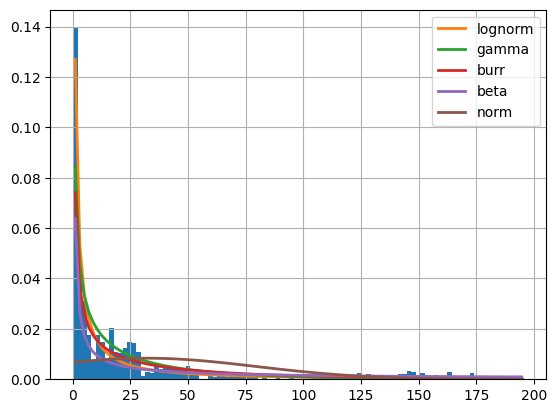

In [ ]:
f1 = Fitter(data1,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f1.fit()
f1.summary()

In [ ]:
f1.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 2.4332607571280156,
  'loc': 0.19948660012058597,
  'scale': 6.003881798991434}}

In [ ]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 2.4081776019250123,
  'loc': 0.19941734181703694,
  'scale': 6.418971517489037}}

### **Lognorm**


Distribuição Lognormal, é uma distribuição de probabilidade contínua que modela variáveis aleatórias cujo logaritmo natural segue uma distribuição normal. É geralmente utilizada para modelar dados que não podem ser negativos, mas que têm uma assimetria positiva, o que significa que a maioria dos valores está concentrada em torno de um valor central, mas existem valores extremamente altos à direita na distribuição.

* **'s'**: É o Desvio Padrão da distribuição lognormal. Quanto maior o valor de 's', mais ampla será a distribuição e, portanto, mais variabilidade nos dados.

* **'loc'**: Representa o deslocamento horizontal da distribuição lognormal. Ele move a distribuição para a esquerda ou para a direita ao longo do eixo x. No seu exemplo, a distribuição está deslocada para a direita, começando em 0.1982331217463151.

* **'scale'**: Controla a escala vertical da distribuição lognormal. Ele afeta a altura da curva e, portanto, a probabilidade de valores altos. Quanto maior o valor de 'scale', maior será a curva.

#### Replicando as distribuições que o prof utilizou

sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma         0.003778  1348.514559  1364.981118     inf      0.092495   
burr          0.004926  1272.245976  1294.201388     inf      0.081056   
beta          0.007110  1248.793614  1270.749026     inf      0.152867   
norm          0.021057  1292.088653  1303.066359     inf      0.256500   

           ks_pvalue  
gamma   9.196975e-14  
burr    1.148712e-10  
beta    5.999220e-37  
norm   3.249418e-104

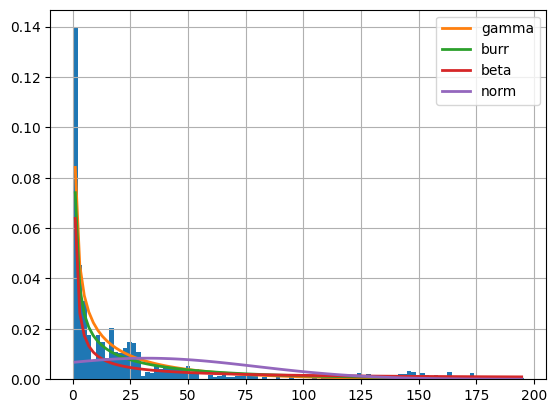

In [ ]:
f2 = Fitter(data1,
           distributions=['gamma',
                          "beta",
                          "burr",
                          "norm"])
f2.fit()
f2.summary()

In [ ]:
f2.get_best(method = 'sumsquare_error')

{'gamma': {'a': 0.4721288081236187,
  'loc': 0.20007324218749997,
  'scale': 49.19013189224951}}

sumsquare_error          aic          bic  kl_div  ks_statistic  \
burr          0.002608  1396.454223  1418.409635     inf      0.147554   
gamma         0.004623  1349.481689  1365.948248     inf      0.107796   
beta          0.007829  1211.733161  1233.688573     inf      0.153785   
norm          0.021290  1268.558314  1279.536020     inf      0.256032   

           ks_pvalue  
burr    1.922670e-34  
gamma   1.509706e-18  
beta    2.169936e-37  
norm   7.867862e-104

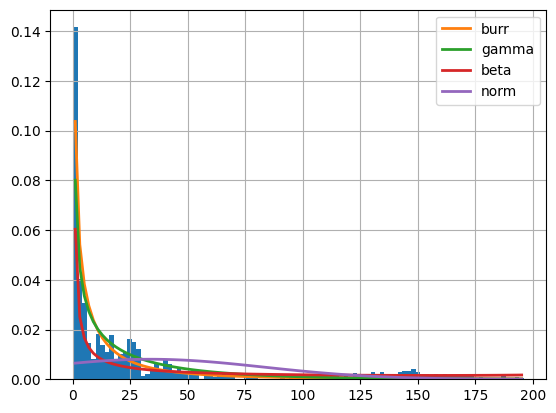

In [ ]:
f3 = Fitter(sample2,
           distributions=['gamma',
                          "beta",
                          "burr",
                          "norm"])
f3.fit()
f3.summary()

In [ ]:
f3.get_best(method = 'sumsquare_error')

{'burr': {'c': 1.2962963987848068,
  'd': 0.3610678574557351,
  'loc': 0.20007324218749997,
  'scale': 24.505214718258777}}

# Entrega 2

* Separar o dataset em dois blocos: 70% para análise e 30% para validação; V
* Da base de análise extrair 03(três) amostras **aleatórias** de 30% da base; V

Testar as hipóteses estatísticas(aula anterior) dessas amostras e plotar: V
* O Gráfico de densidade comparando as amostras e calcular os erros(Desvio); V
* O Gráfico QQ (e P-P comentado)V
* E 01(um) boxplot com as métricas comparando as amostras V

Apresentar **conclusão** para esta análise.

##Dados 2017 em diante

In [ ]:
df['data'] = pd.to_datetime(df['Date'],  utc=True)

dados = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/World-Stock-Prices-Dataset.csv', sep = ',', parse_dates=['Date'])

condicao = dados['Date'].apply(lambda x: x.year) >= 2017


dados_2017_em_diante = df[condicao]



In [ ]:
tech_2017 = get_data(dados_2017_em_diante, companies_tech)

tech_2017 = tech_2017.sort_values('Date')

fig1 = px.line(tech_2017, x='Date', y='Close', color='Brand_Name', title='Série temporal das ações de empresas de tecnologia', labels={'Brand_Name': 'Empresa'})
fig1.update_yaxes(title_text='Fechamento')
fig1.update_xaxes(title_text='Data')
fig1.update_coloraxes(colorbar_title='Empresa')

fig1.show()



## Separando a base de 70% para análise

In [ ]:
from sklearn.model_selection import train_test_split

# = df_analise.sort_values(by='Date')

df_analise = tech_2017.sample(frac=1, random_state=42)

analise, teste = train_test_split(df_analise, test_size=0.3, shuffle=True, random_state=42)  # random_state para reprodutibilidade

##analise = df_analise.sample(frac=0.7, random_state=42, replace = 'false')

print(f"Tamanho base original: {len(analise)} \n Tamanho base análise: {len(analise)}" )
print(f"Tamanho teste: {len(teste)}")

analise

Tamanho base original: 8027 
 Tamanho base análise: 8027
Tamanho teste: 3441


Date        Open        High         Low  \
24000  2021-11-04 00:00:00-04:00  149.846379  150.686648  148.917127   
42492  2023-07-11 00:00:00-04:00  157.339996  161.770004  156.660004   
92350  2019-07-24 00:00:00-04:00   44.105008   44.475451   43.344234   
18365  2023-02-15 00:00:00-05:00   99.089996  101.169998   98.449997   
24399  2023-06-08 00:00:00-04:00  177.660080  180.596117  177.220686   
...                          ...         ...         ...         ...   
18223  2022-07-25 00:00:00-04:00  122.699997  123.639999  120.029999   
17027  2017-10-20 00:00:00-04:00   49.676498   49.730999   49.099998   
65561  2020-12-16 00:00:00-05:00  209.557978  214.788389  209.528704   
92745  2021-02-17 00:00:00-05:00  151.382152  151.906011  147.480598   
65413  2020-05-18 00:00:00-04:00  179.848971  180.284672  178.115843   

            Close      Volume  Dividends  Stock Splits Brand_Name Ticker  \
24000  149.233475  60394600.0        0.0           0.0      apple   AAPL   
42492  160.580002   1160600.0        0.0           0.0    spotify   SPOT   
92350   44.418270  36623600.0        0.0           0.0     nvidia   NVDA   
18365  101.160004  47957600.0        0.0           0.0     amazon   AMZN   
24399  180.326492  50214900.0        0.0           0.0      apple   AAPL   
...           ...         ...        ...           ...        ...    ...   
18223  121.139999  50221300.0        0.0           0.0     amazon   AMZN   
17027   49.145500  47302000.0        0.0           0.0     amazon   AMZN   
65561  213.978455  35023300.0        0.0           0.0  microsoft   MSFT   
92745  148.737869  27475600.0        0.0           0.0     nvidia   NVDA   
65413  179.035660  35264500.0        0.0           0.0  microsoft   MSFT   

      Industry_Tag Country                      data  
24000   technology     usa 2021-11-04 04:00:00+00:00  
42492        music     usa 2023-07-11 04:00:00+00:00  
92350   technology     usa 2019-07-24 04:00:00+00:00  
18365   e-commerce     usa 2023-02-15 05:00:00+00:00  
24399   technology     usa 2023-06-08 04:00:00+00:00  
...            ...     ...                       ...  
18223   e-commerce     usa 2022-07-25 04:00:00+00:00  
17027   e-commerce     usa 2017-10-20 04:00:00+00:00  
65561   technology     usa 2020-12-16 05:00:00+00:00  
92745   technology     usa 2021-02-17 05:00:00+00:00  
65413   technology     usa 2020-05-18 04:00:00+00:00  

[8027 rows x 13 columns]

In [ ]:
def get_data(df_temp, Brand_Names):

    nameStock = df_temp[df_temp["Brand_Name"].isin(Brand_Names)]
    return nameStock

companies_tech = ["apple", "google", "microsoft", "nvidia","adobe","amazon","spotify"]
analise_tech = get_data(analise,companies_tech)



analise_tech = analise_tech.sort_values('Date')

fig1 = px.line(analise_tech, x='Date', y='Close', color='Brand_Name', title='Série temporal das ações de empresas de tecnologia', labels={'Brand_Name': 'Empresa'})
fig1.update_yaxes(title_text='Fechamento')
fig1.update_xaxes(title_text='Data')
fig1.update_coloraxes(colorbar_title='Empresa')

fig1.show()

### Da base de análise (70%) extrair 03(três) amostras aleatórias de 30%.

In [ ]:
sample_list = []

# Assuming 'analise' is a DataFrame or Series containing your data
for i in range(3):
    sample = analise.sample(frac=0.30)
    sample_list.append(sample)  # Append the sample to the list

print(len(sample_list[0]))
print(len(sample_list[1]))
print(len(sample_list[2]))

print(len(teste))



2408
2408
2408
3441


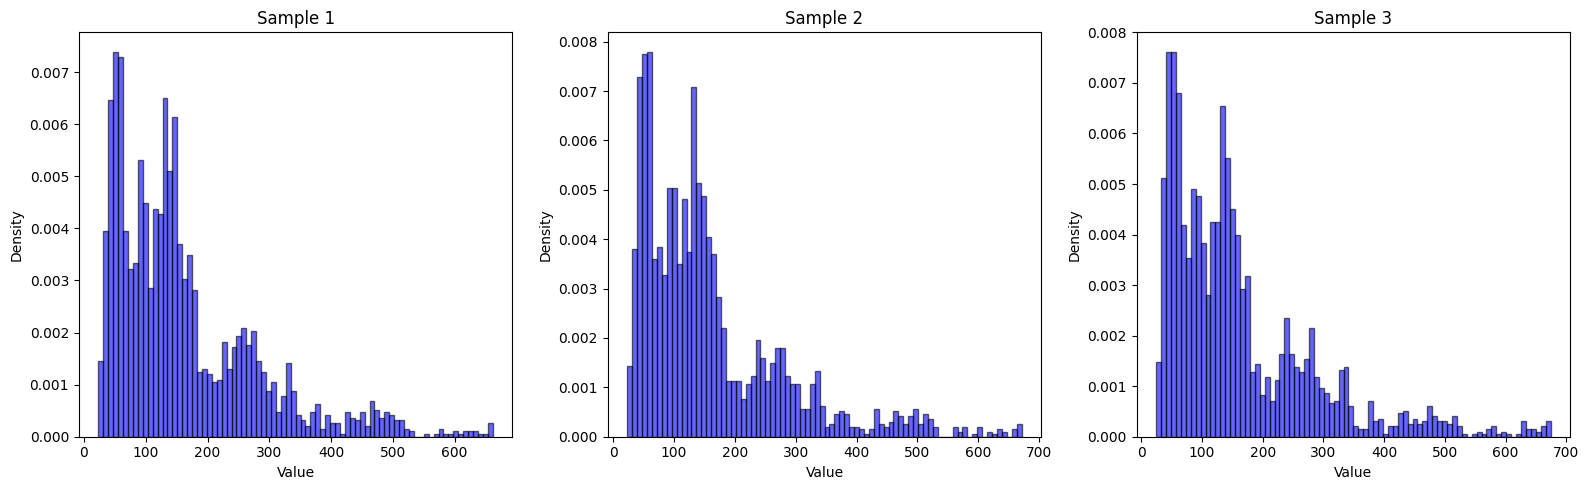

In [ ]:
plt.figure(figsize=(16, 5))
for i, sample in enumerate(sample_list, 1):
    plt.subplot(1, 3, i)
    plt.hist(sample['Close'], bins=80, density=True, alpha=0.6, color='blue', edgecolor='black')
    plt.title(f'Sample {i}')
    plt.xlabel('Value')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

## Teste de Shapiro-Wilk

Para verificar a normalidade das amostras.
Hipótese nula (H0) -> Dados seguem uma distribuição normal

In [ ]:
import scipy.stats as stats

_, p_value1 = stats.shapiro(sample_list[0]['Close'])
_, p_value2 = stats.shapiro(sample_list[1]['Close'])
_, p_value3 = stats.shapiro(sample_list[2]['Close'])

print("Sample 1 p-value:", p_value1)
print("Sample 2 p-value:", p_value2)
print("Sample 3 p-value:", p_value3)

Sample 1 p-value: 9.718004850092606e-42
Sample 2 p-value: 5.044674471569341e-44
Sample 3 p-value: 4.0637655465419695e-44


[Sample 1] Hipótese nula rejeitada: os dados da amostra não são normalmente distribuiídos
[Sample 2] Hipótese nula rejeitada: os dados da amostra não são normalmente distribuiídos
[Sample 3] Hipótese nula rejeitada: os dados da amostra não são normalmente distribuiídos


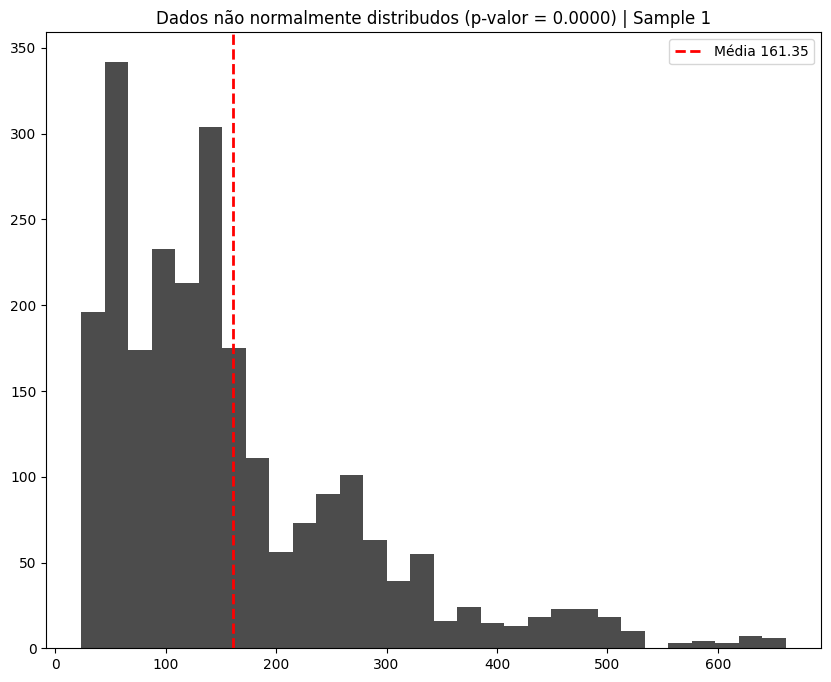

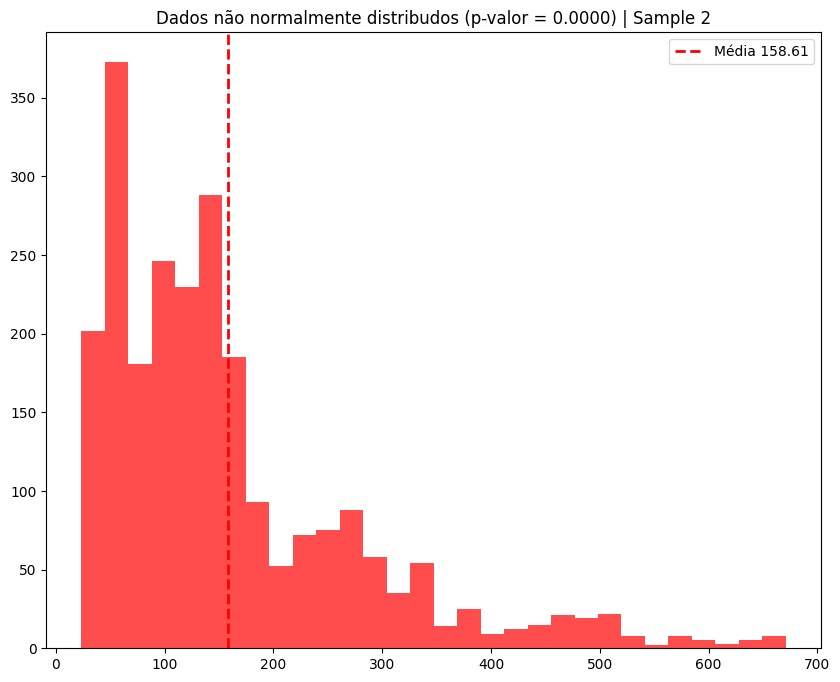

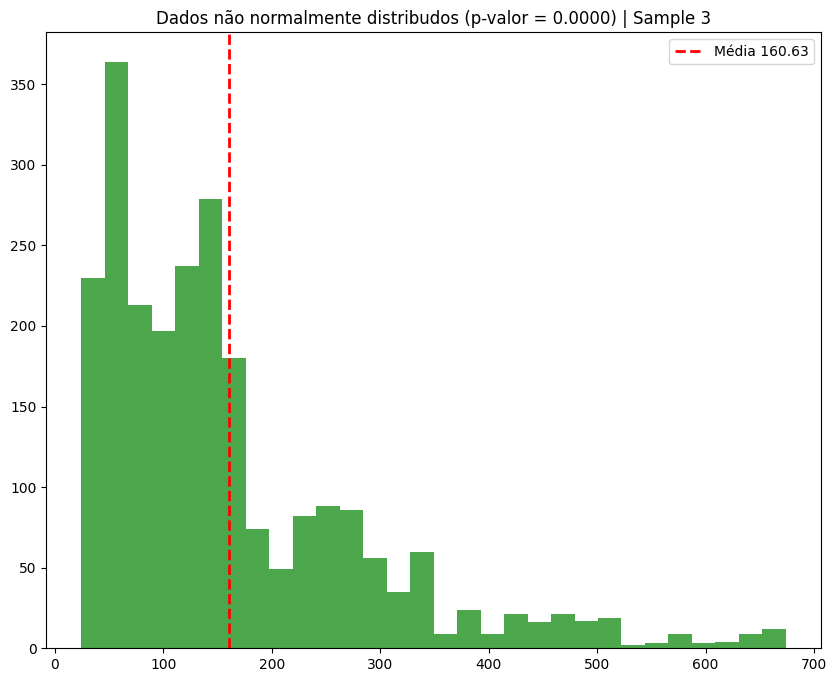

In [ ]:
color =['black','red', 'green']

for i, sample in enumerate(sample_list, 1):
  res, statistic, p_value = check_if_normal(sample['Close'])
  print(f'[Sample {i}] ' + get_shapiro_result(res))
  fig, ax = plt.subplots(figsize=(10, 8))
  ax.hist(sample['Close'], bins=30, color=color[i-1], alpha=0.7)
  mean_value = np.mean(sample['Close'])
  formatted_mean = f'{mean_value:.2f}'
  ax.axvline(x=np.mean(sample['Close']), color='red', linestyle='dashed', linewidth=2, label=f'Mean Value: {formatted_mean}')
  ax.set_title(f"Dados não normalmente distribudos (p-valor = {p_value:.4f}) | Sample {i}")
  ax.legend(['Média '+ formatted_mean])

Analise (70%) e Teste(30%)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



analise p-value: 0.0
teste p-value: 0.0
[Amostra 1] Hipótese nula rejeitada: os dados da amostra não são normalmente distribuiídos
[Amostra 2] Hipótese nula rejeitada: os dados da amostra não são normalmente distribuiídos


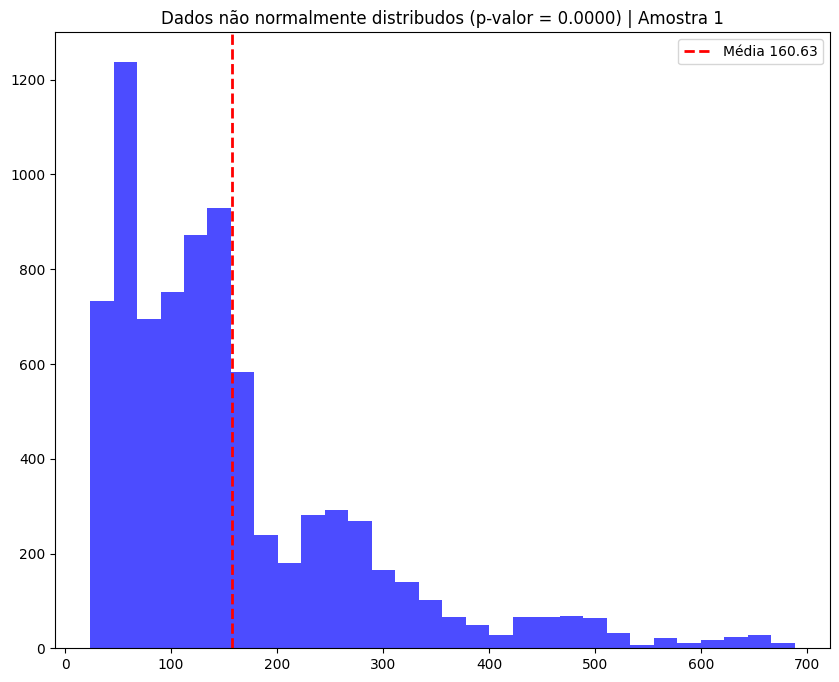

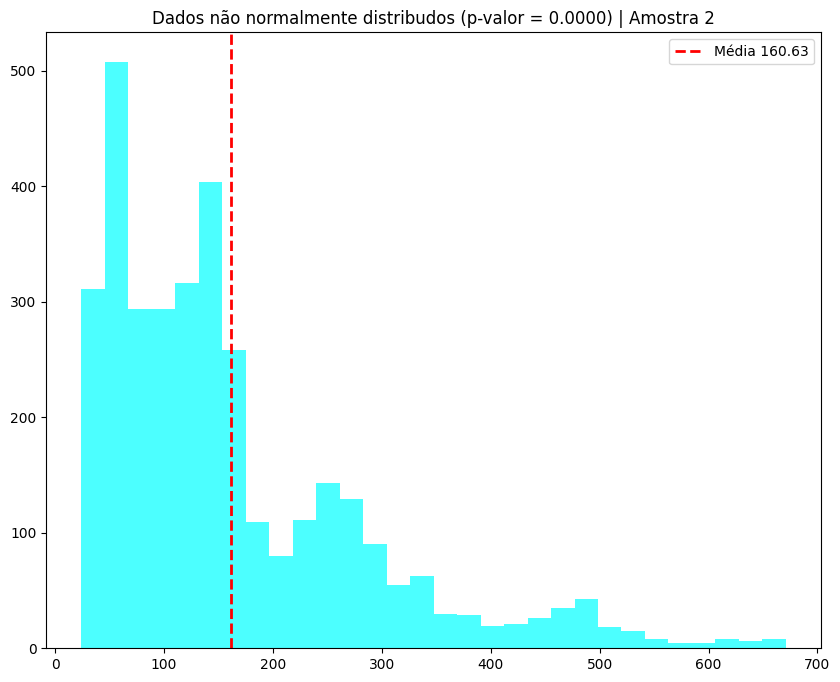

In [ ]:
_, p_value4 = stats.shapiro(analise['Close'])
_, p_value5 = stats.shapiro(teste['Close'])

print("analise p-value:", p_value4)
print("teste p-value:", p_value5)

color =['blue','cyan']

validation_list = [analise, teste]

for i, validate in enumerate(validation_list, 1):
  res, statistic, p_value = check_if_normal(validate['Close'])
  print(f'[Amostra {i}] ' + get_shapiro_result(res))
  fig, ax = plt.subplots(figsize=(10, 8))
  ax.hist(validate['Close'], bins=30, color=color[i-1], alpha=0.7)
  mean_value = np.mean(sample['Close'])
  formatted_mean = f'{mean_value:.2f}'
  ax.axvline(x=np.mean(validate['Close']), color='red', linestyle='dashed', linewidth=2, label=f'Mean Value: {formatted_mean}')
  ax.set_title(f"Dados não normalmente distribudos (p-valor = {p_value:.4f}) | Amostra {i}")
  ax.legend(['Média '+ formatted_mean])

##Teste de Kolmogorov-Smirnov

Para verificar a equidade de distribuição entre duas amostras

In [ ]:
combo_list = []
for i in range(len(sample_list)):
  combo_list.append([i+1, sample_list[i]])
combinations = list(itertools.combinations(combo_list, 2))

In [ ]:
def print_ks_comparison(data1, data2,l1,l2):
  res, statistic, p_value = check_ks(data1, data2)
  print(get_ks_result(res))
  print(f'P-Value: {p_value}\n')
  res, statistic, p_value = check_ks(data1, data2)

  # Plote o gráfico
  plt.figure(figsize=(8, 4))
  plt.plot(np.sort(data1), np.arange(1, len(data1) + 1) / len(data1), marker='o', linestyle='none', label=f'Amostra {l1} (ECDF)')
  plt.plot(np.sort(data2), np.arange(1, len(data2) + 1) / len(data2), marker='o', linestyle='none', label=f'Amostra {l2} (ECDF)')

  plt.xlabel('Valores')
  plt.ylabel('Probabilidade Acumulada')
  plt.title(f'ECDFs de Amostra {l1} e Amostra {l2}')

  # Adicione o resultado do teste no gráfico
  result_text = get_ks_result(res)
  plt.text(0.4, 0.6, result_text, fontsize=10, transform=plt.gca().transAxes)

  plt.legend()
  plt.grid(True)
  plt.show()

Comparando amostra 1 com amostra 2
Falha em rejeitar a hipótese nula:
    Os dados tem distribuições similares
P-Value: 0.3089327435053854



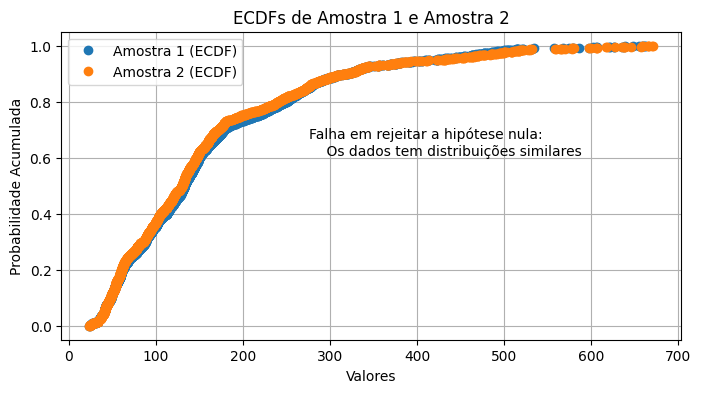

Comparando amostra 1 com amostra 3
Falha em rejeitar a hipótese nula:
    Os dados tem distribuições similares
P-Value: 0.3089327435053854



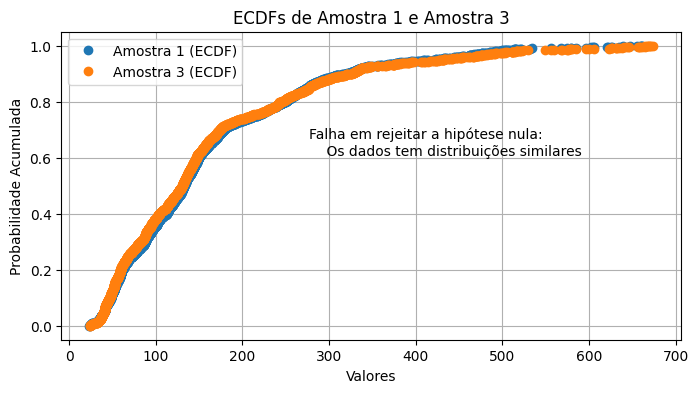

Comparando amostra 2 com amostra 3
Falha em rejeitar a hipótese nula:
    Os dados tem distribuições similares
P-Value: 0.876325418807735



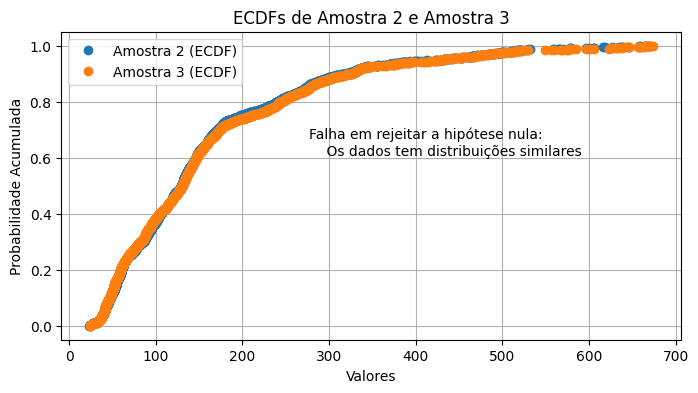

In [ ]:
for combo in combinations:
  print(f'Comparando amostra {combo[0][0]} com amostra {combo[1][0]}')
  print_ks_comparison(combo[0][1]['Close'], combo[1][1]['Close'],combo[0][0],combo[1][0])

Comparando amostra 1 vs a amostra de treino
Falha em rejeitar a hipótese nula:
    Os dados tem distribuições similares
P-Value: 0.11777705356633486



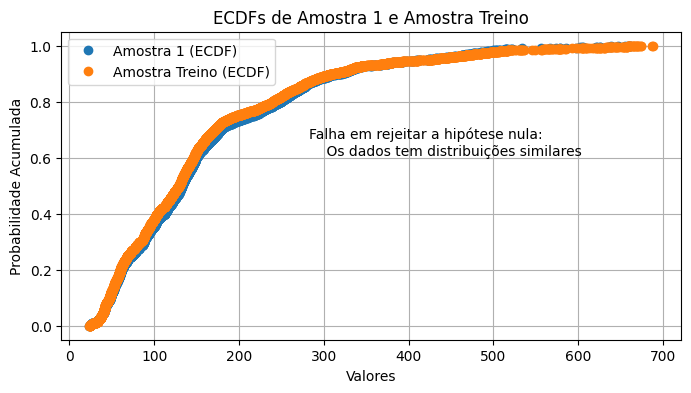

Comparando amostra 2 vs a amostra de treino
Falha em rejeitar a hipótese nula:
    Os dados tem distribuições similares
P-Value: 0.9656850995051918



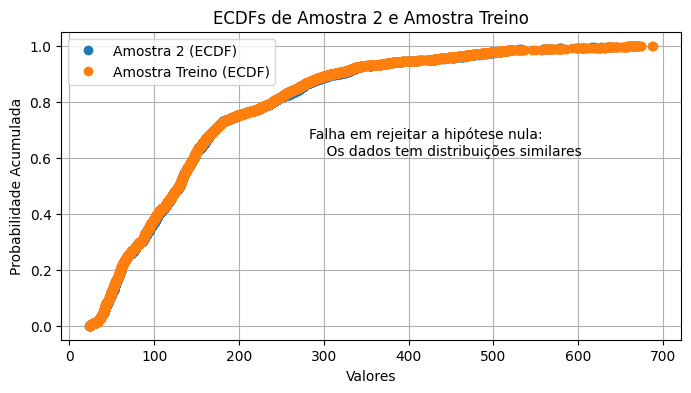

Comparando amostra 3 vs a amostra de treino
Falha em rejeitar a hipótese nula:
    Os dados tem distribuições similares
P-Value: 0.705052903629709



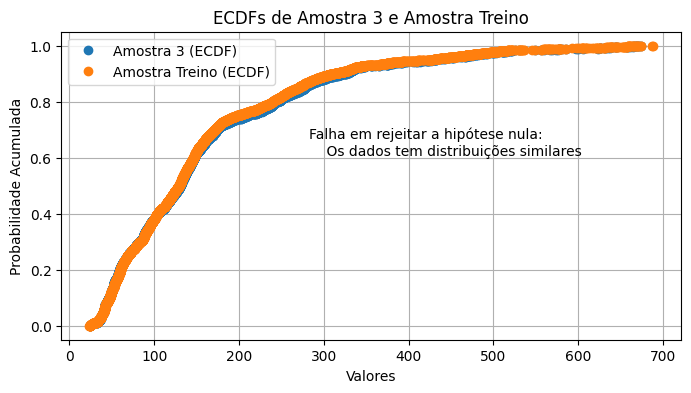

In [ ]:
for i in range(len(sample_list)):
  print(f'Comparando amostra {i+1} vs a amostra de treino')
  print_ks_comparison(sample_list[i]['Close'], analise['Close'],i+1,'Treino')

Comparando amostra 1 com a amostra de validação
Falha em rejeitar a hipótese nula:
    Os dados tem distribuições similares
P-Value: 0.11777705356633486



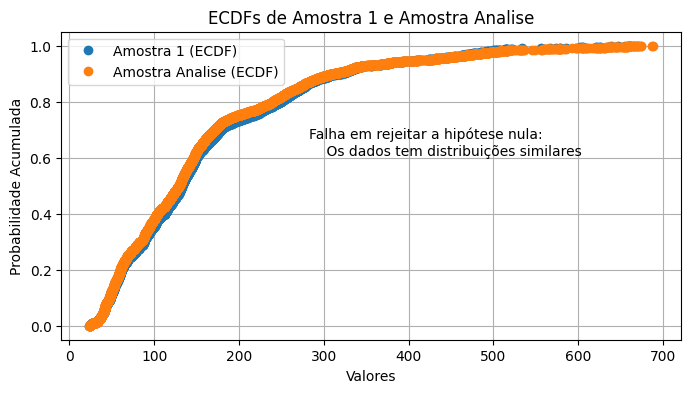

Comparando amostra 2 com a amostra de validação
Falha em rejeitar a hipótese nula:
    Os dados tem distribuições similares
P-Value: 0.9656850995051918



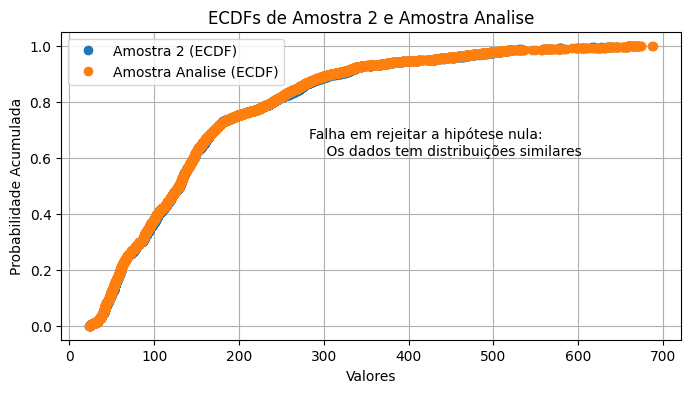

Comparando amostra 3 com a amostra de validação
Falha em rejeitar a hipótese nula:
    Os dados tem distribuições similares
P-Value: 0.705052903629709



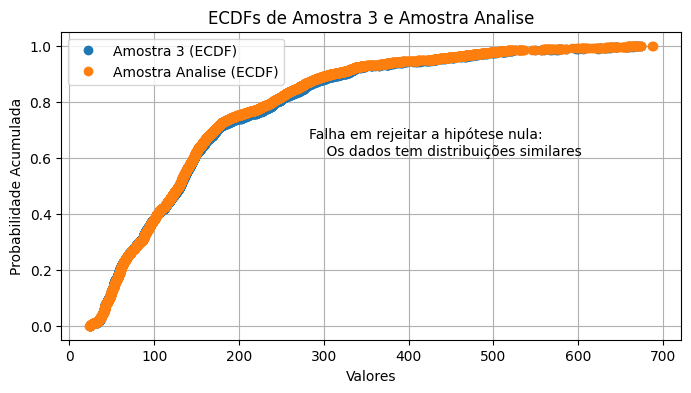

In [ ]:
for i in range(len(sample_list)):
  print(f'Comparando amostra {i+1} com a amostra de validação')
  print_ks_comparison(sample_list[i]['Close'], analise['Close'],i+1,'Analise')

Comparando Analise com Teste
Falha em rejeitar a hipótese nula:
    Os dados tem distribuições similares
P-Value: 0.08091290803578309



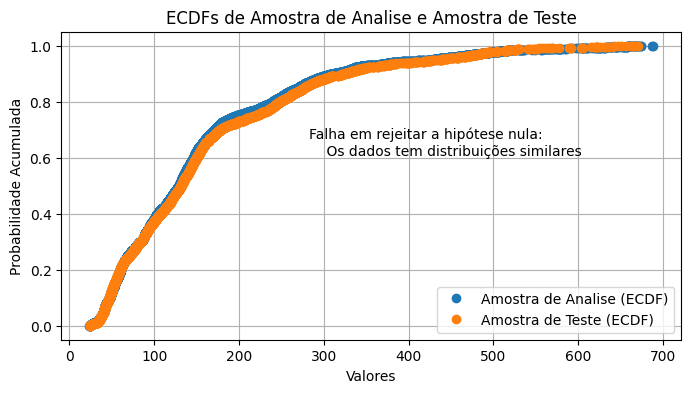

In [ ]:
print(f'Comparando Analise com Teste')
print_ks_comparison(analise['Close'], teste['Close'],'de Analise','de Teste')

##Teste de Pearson

Para testar a correlação entre duas amostras

In [ ]:
from scipy.stats import pearsonr

def print_prs_comparison(data1, data2):
  stat, p = pearsonr(data1, data2)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print('Provavelmente Independentes')
  else:
    print('Provavelmente Dependentes')

  # Cria um gráfico de dispersão
  plt.scatter(data1, data2, color=['blue'], alpha=0.3, label=f'Correlação de Pearson = {stat:.3f}')
  plt.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)), color='red', linewidth=2, linestyle='--', label='Linha de Regressão')

  plt.title('Gráfico de Dispersão com Linha de Regressão')
  plt.legend()
  plt.show()


Amostra 1 vs Amostra 2
stat=0.032, p=0.118
Provavelmente Independentes


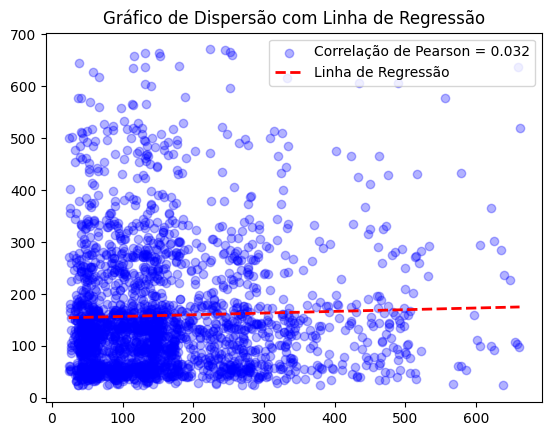


Amostra 1 vs Amostra 3
stat=0.018, p=0.383
Provavelmente Independentes


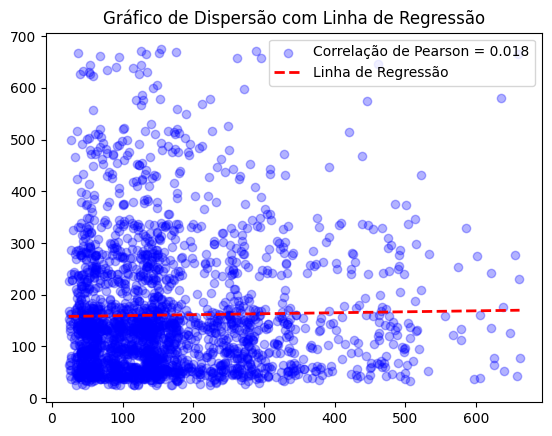


Amostra 2 vs Amostra 3
stat=-0.017, p=0.413
Provavelmente Independentes


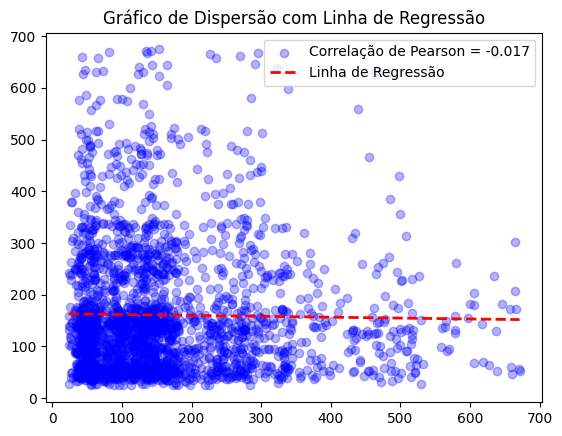

In [ ]:
for combo in combinations:
  print(f'\nAmostra {combo[0][0]} vs Amostra {combo[1][0]}')
  print_prs_comparison(combo[0][1]['Close'], combo[1][1]['Close'])

In [ ]:
#for i in range(len(sample_list)):
 # print(f'Comparando amostra {i+1} com a amostra de treino')
 # print_prs_comparison(sample_list[i]['Close'], teste['Close'])

Para que seja possível realizar o teste de Pearson é preciso que as amostras comparadas tenham o mesmo tamanho. Isso se mostra fundamental, poiso coeficiente de correlação de Pearson (r de Pearson) mede a relação linear entre dois conjuntos de dados, par em par. Se os comprimentos forem diferentes, não será possível estabelecer uma correspondência um-a-um entre os pontos de dados para o cálculo da correlação.

### Vs Amostra Validação

Comparando amostra 1 com a amostra de treino
stat=-0.047, p=0.020
Provavelmente Dependentes


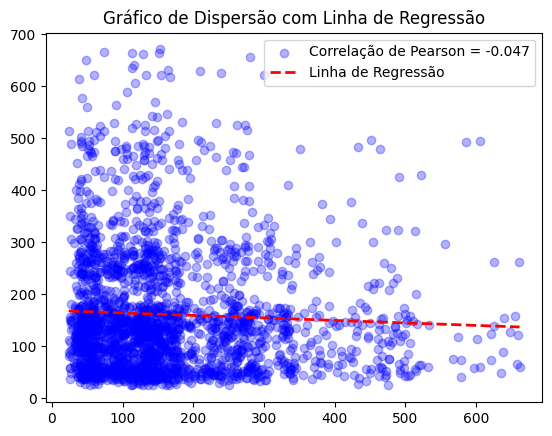

Comparando amostra 2 com a amostra de treino
stat=-0.016, p=0.424
Provavelmente Independentes


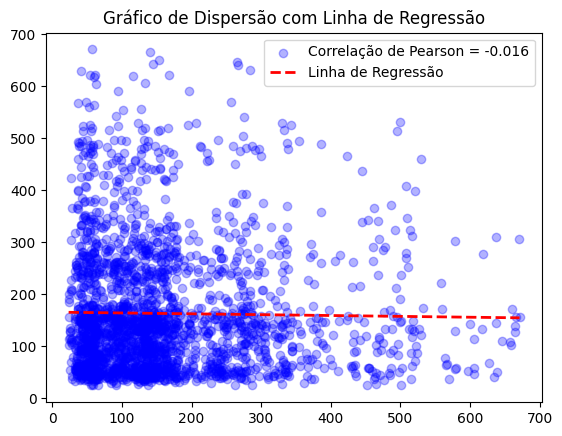

Comparando amostra 3 com a amostra de treino
stat=0.000, p=0.997
Provavelmente Independentes


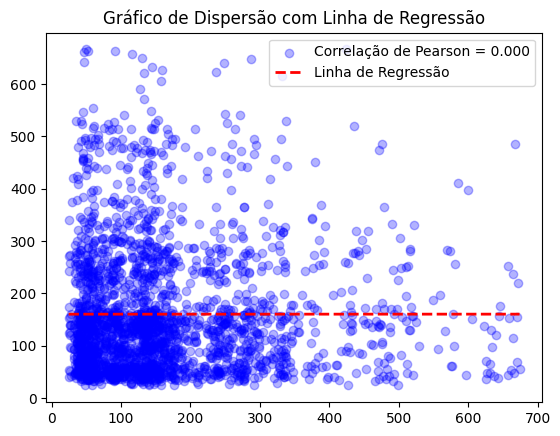

In [ ]:
for i in range(len(sample_list)):
  print(f'Comparando amostra {i+1} com a amostra de treino')
  print_prs_comparison(sample_list[i]['Close'], teste['Close'].sample(2408))

### Vs Analise

Comparando amostra 1 com a amostra de Analise
stat=0.025, p=0.220
Provavelmente Independentes


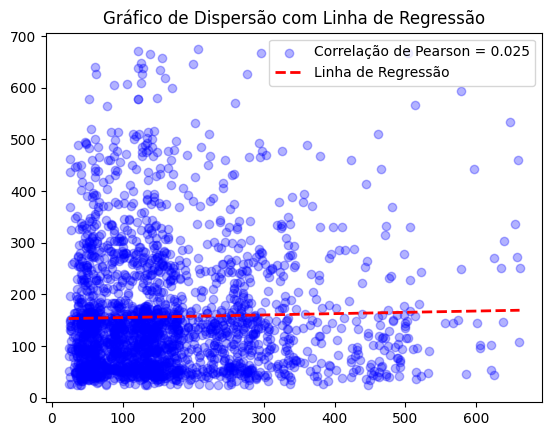

Comparando amostra 2 com a amostra de Analise
stat=-0.012, p=0.572
Provavelmente Independentes


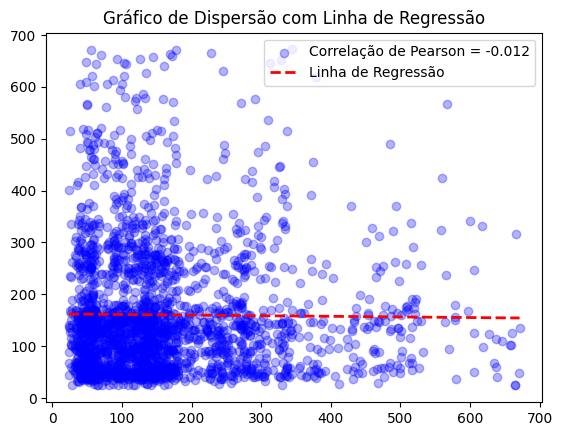

Comparando amostra 3 com a amostra de Analise
stat=-0.001, p=0.968
Provavelmente Independentes


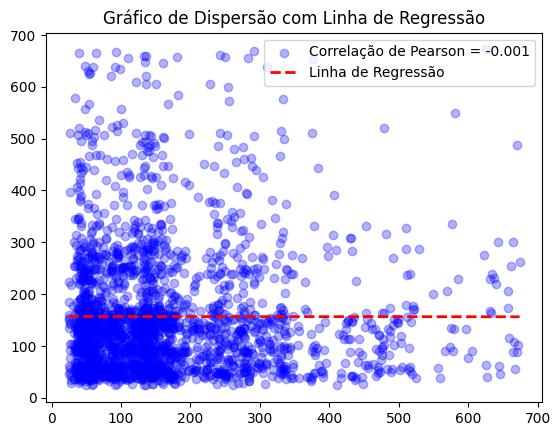

In [ ]:
for i in range(len(sample_list)):
  print(f'Comparando amostra {i+1} com a amostra de Analise')
  print_prs_comparison(sample_list[i]['Close'], analise['Close'].sample(2408))

## Teste de hipóteses ANOVA

In [ ]:
import numpy as np
from scipy.stats import f_oneway

# Executando o teste ANOVA
stat, p = f_oneway(sample_list[0]['Close'], sample_list[1]['Close'], sample_list[2]['Close'])

# Imprimindo os resultados
print("Estatística de teste F: {:.3f}".format(stat))
print("valor-p: {:.3f}".format(p))

if p < 0.05:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística de teste F: 0.342
valor-p: 0.710
Não rejeitamos a hipótese nula.


Em outras palavras, os dados não fornecem uma diferença estatisticamente significativa entre os grupos testados. A hipótese nula geralmente afirma que não há diferença significativa entre os grupos.

### Comparando todas as amostras

In [ ]:
import numpy as np
from scipy.stats import f_oneway

# Executando o teste ANOVA
stat, p = f_oneway(sample_list[0]['Close'], sample_list[1]['Close'], sample_list[2]['Close'], analise['Close'], teste['Close'])

# Imprimindo os resultados
print("Estatística de teste F: {:.3f}".format(stat))
print("valor-p: {:.3f}".format(p))

if p < 0.05:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística de teste F: 1.111
valor-p: 0.349
Não rejeitamos a hipótese nula.


## Gráfico de Densidade comparando as amostras e calcular os erros (Desvio)

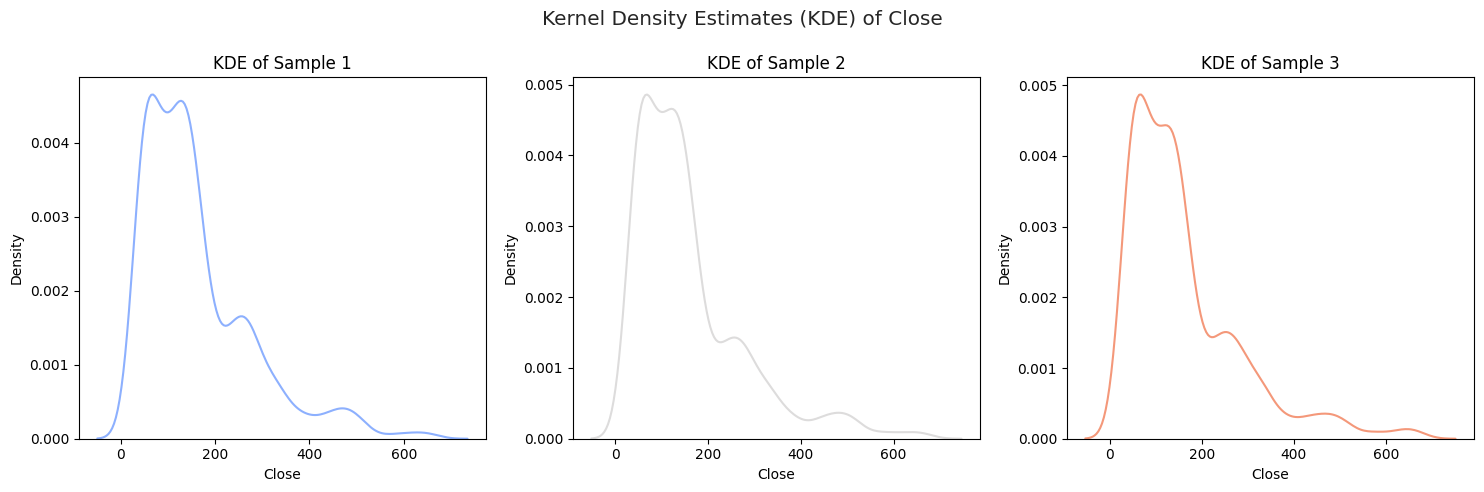

In [ ]:
# Create and Configure a figure with subplots
import warnings

# Desativar mensagens de aviso
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(nrows=1, ncols=len(sample_list), figsize=(15, 5))
sns.set(style="whitegrid")
colors = sns.color_palette("coolwarm", n_colors=len(sample_list))

# Plot KDE for each sample
for i, sample in enumerate(sample_list, start=1):
    sns.kdeplot(data=sample['Close'], color=colors[i-1], ax=axes[i-1])
    axes[i-1].set_title(f"KDE of Sample {i}")
    axes[i-1].set_xlabel('Close')
    axes[i-1].set_ylabel('Density')

# Set a common title
plt.suptitle("Kernel Density Estimates (KDE) of Close")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Desvio entre Amostra 2 e Amostra 1: -2.74
Desvio entre Amostra 3 e Amostra 1: -0.72


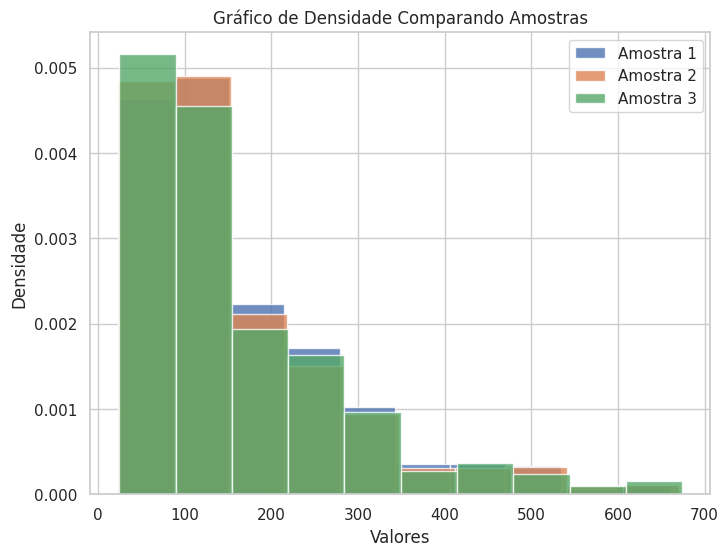

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
# Criar um gráfico de densidade comparando as amostras
plt.figure(figsize=(8, 6))
for i, sample in enumerate(sample_list, start=1):

    plt.hist(sample["Close"],density=True, alpha=0.8, label=f'Amostra {i}')

plt.title('Gráfico de Densidade Comparando Amostras')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.legend(loc='upper right')

# Calcular e imprimir os desvios entre as amostras
errors = []
for i in range(1, len(sample_list)):
    error = np.mean(sample_list[i]["Close"]) - np.mean(sample_list[0]["Close"])
    errors.append(error)
    print(f'Desvio entre Amostra {i + 1} e Amostra 1: {error:.2f}')

plt.show()

Desvio entre Analise e Teste: 0.45


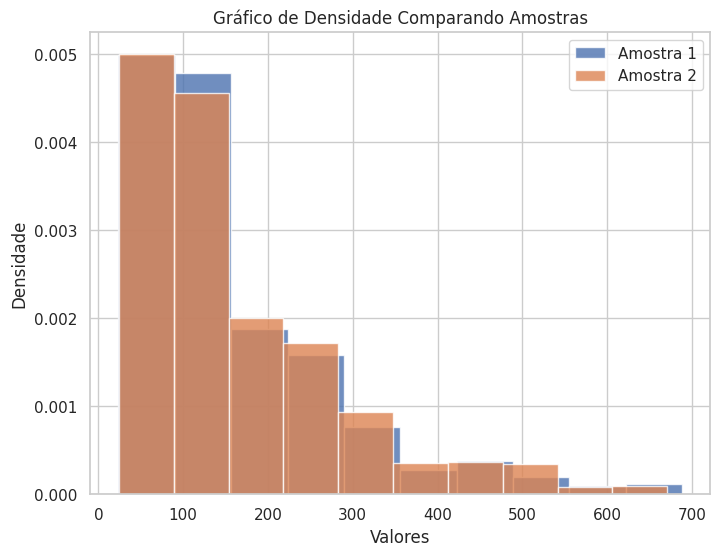

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
# Criar um gráfico de densidade comparando as amostras
plt.figure(figsize=(8, 6))
for i, sample in enumerate(validation_list, start=1):

    plt.hist(sample["Close"],density=True, alpha=0.8, label=f'Amostra {i}')

plt.title('Gráfico de Densidade Comparando Amostras')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.legend(loc='upper right')

# Calcular e imprimir os desvios entre as amostras
errors = []
for i in range(1, len(validation_list)):
    error = np.mean(validation_list[i]["Close"]) - np.mean(sample_list[0]["Close"])
    errors.append(error)
    print(f'Desvio entre Analise e Teste: {error:.2f}')

plt.show()

## Gráfico QQ

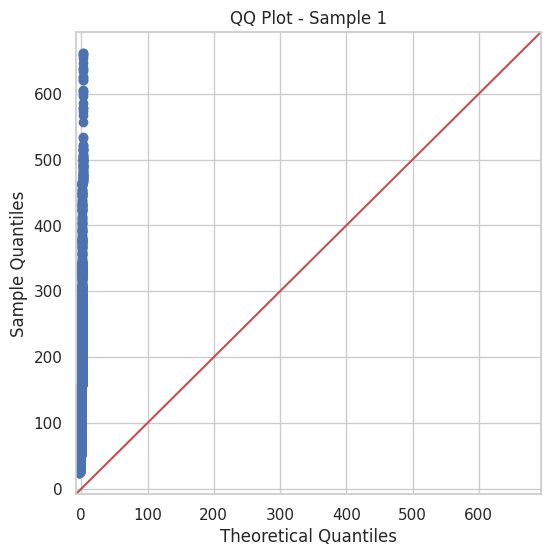

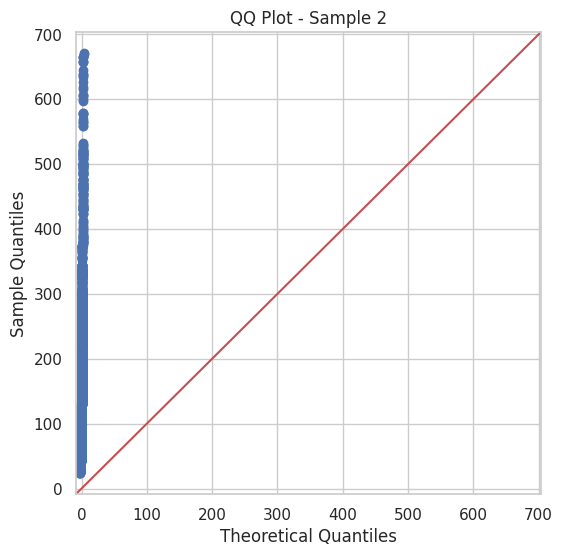

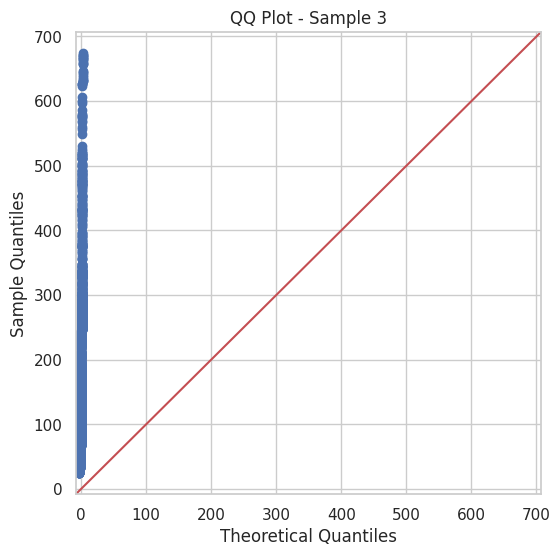

In [ ]:
for i, sample in enumerate(sample_list, start=1):
    # Fit a theoretical distribution (e.g., normal) to the sample
    mean, std_dev = np.mean(sample['Close']), np.std(sample['Close'])
    theoretical_distribution = np.random.normal(mean, std_dev, len(sample))

    # Create a QQ plot
    fig, ax = plt.subplots(figsize=(6, 6))
    sm.qqplot(sample['Close'], line='45', ax=ax)
    plt.title(f'QQ Plot - Sample {i}')
    plt.show()

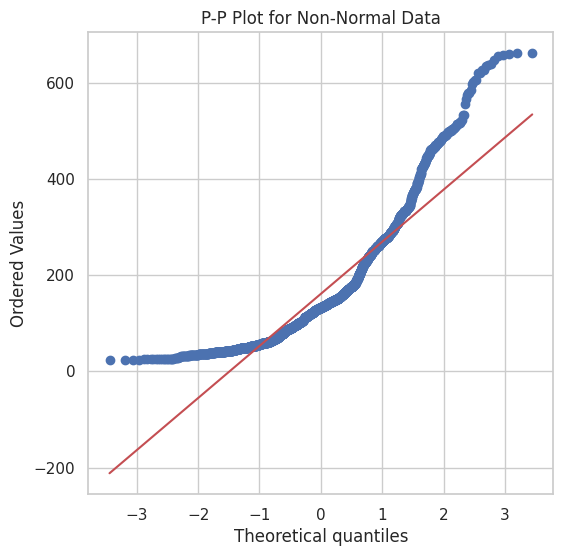

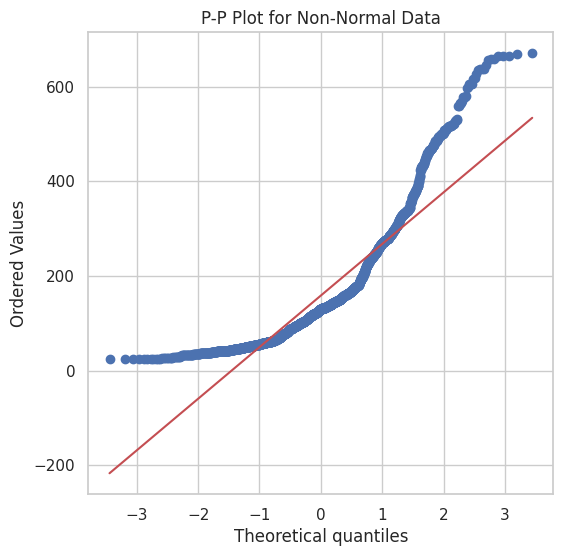

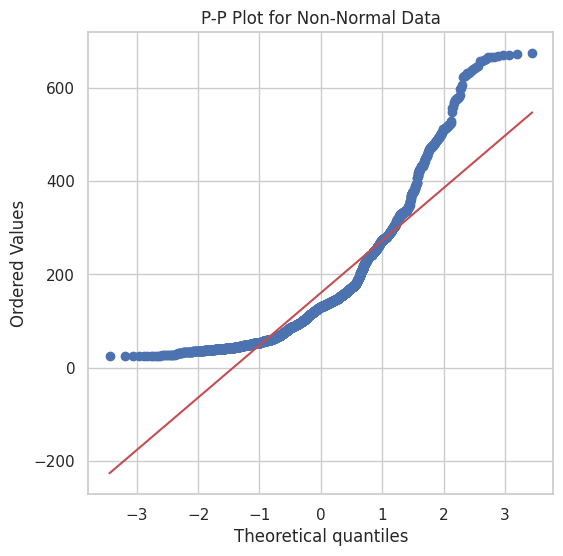

In [ ]:
 for i, sample in enumerate(sample_list, start=1):
    # Fit a theoretical distribution (e.g., normal) to the sample
    mean, std_dev = np.mean(sample['Close']), np.std(sample['Close'])
    theoretical_distribution = np.random.normal(mean, std_dev, len(sample))
 # Create a P-P plot
    fig, ax = plt.subplots(figsize=(6, 6))
    stats.probplot(sample['Close'], dist="norm", plot=ax)
    ax.set_title('P-P Plot for Non-Normal Data')
    plt.show()

## BoxPlot

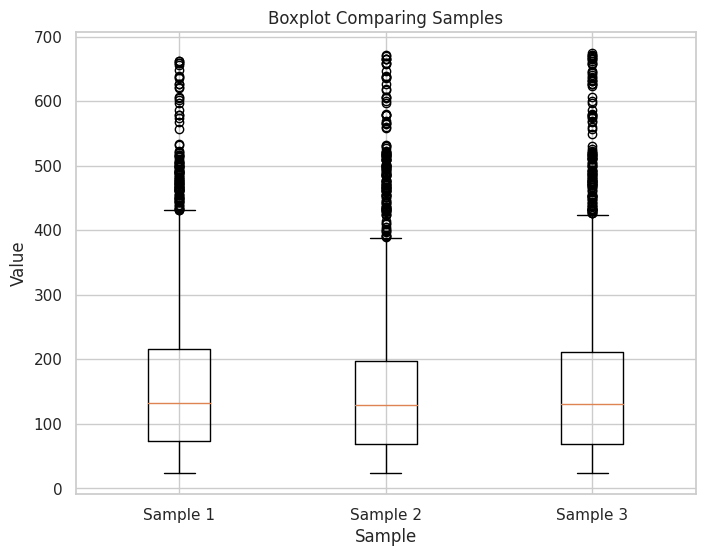

In [ ]:
import matplotlib.pyplot as plt
# Create a list of labels for the boxplot
labels = [f'Sample {i}' for i in range(1, len(sample_list) + 1)]

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([sample['Close'] for sample in sample_list], labels=labels, showfliers=True)
plt.title('Boxplot Comparing Samples')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Convert sample_list to a single DataFrame
df = pd.concat(sample_list, keys=[f'Sample {i}' for i in range(1, len(sample_list) + 1)])

fig = px.box(df, x=df.index.get_level_values(0), y='Close', labels={'x': 'Sample', 'y': 'Value'},
             title='Boxplot Comparing Samples')

# Show the plot
fig.show()

In [ ]:
temp = [analise, teste]

df2 = pd.concat(temp, keys=[f'Sample {i}' for i in range(1, len(temp) + 1)])

fig2 = px.box(df2, x=df2.index.get_level_values(0), y='Close', labels={'x': 'Sample', 'y': 'Value'},
             title='Boxplot Comparing Analise e Teste')

# Show the plot
fig2.show()

# Conclusão

Por se tratar de uma base de dados baseada em série temporal, e nenhum dos dados se correlacionarem, não foi possível chegar a uma conclusão com base nas análises estatísticas realizadas.

Não encontramos evidências de diferenças significativas entre as amostras ou correlações nos dados, devido à natureza das séries temporais e à falta de correlação observada.

# Extras

In [ ]:
df['Industry_Tag']


Sample 1  18220    e-commerce
          92010    technology
          17870    e-commerce
          42243         music
          17860    e-commerce
                      ...    
Sample 3  17398    e-commerce
          92659    technology
          23238    technology
          65986    technology
          41866         music
Name: Industry_Tag, Length: 7224, dtype: object

Comparando amostra 1 com a amostra de treino
stat=-0.008, p=0.685
Provavelmente Independentes


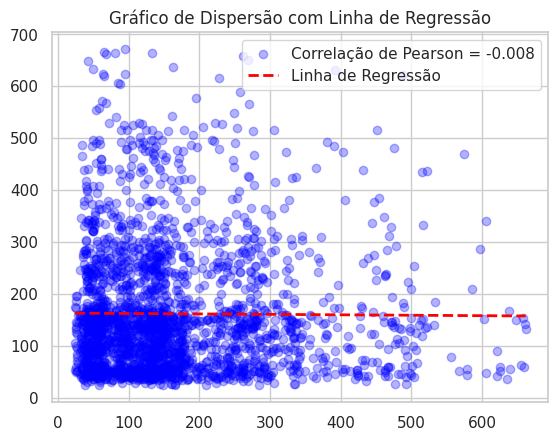

Comparando amostra 2 com a amostra de treino
stat=-0.015, p=0.472
Provavelmente Independentes


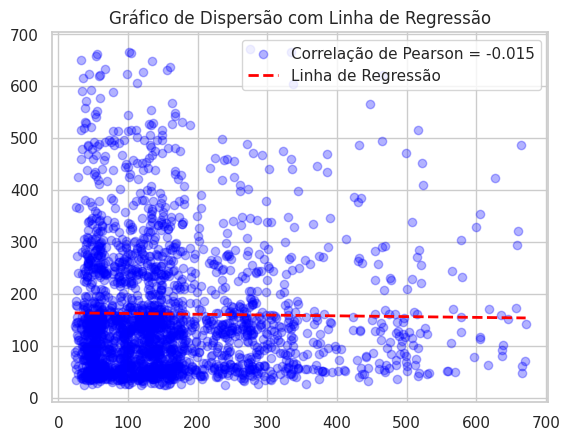

Comparando amostra 3 com a amostra de treino
stat=0.026, p=0.197
Provavelmente Independentes


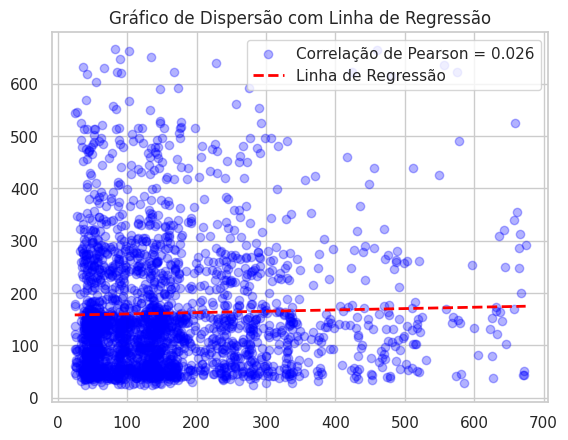

In [ ]:
for i in range(len(sample_list)):
  print(f'Comparando amostra {i+1} com a amostra de treino')
  print_prs_comparison(sample_list[i]['Close'], teste['Close'].sample(2408))

In [ ]:
Country = dados['Industry_Tag']

elementos_unicos = dados['Industry_Tag'].unique()

print(elementos_unicos)

['fitness' 'entertainment' 'retail' 'e-commerce' 'technology' 'apparel'
 'music' 'gaming' 'aviation' 'automotive' 'food & beverage'
 'consumer goods' 'food' 'social media' 'footwear' 'finance'
 'financial services' 'luxury goods' 'hospitality' 'healthcare'
 'cryptocurrency' 'logistics' 'manufacturing']


In [ ]:
df_tech = dados[dados['Industry_Tag'] == 'gaming']

act = df_tech[df_tech['Brand_Name'] == 'ubisoft']

df_tech

Date       Open    High    Low   Close  \
11      2023-09-08 00:00:00-04:00  28.947001  29.305  28.42  29.010   
12      2023-09-08 00:00:00-04:00  10.730000  10.840  10.62  10.800   
43      2023-09-08 00:00:00-04:00   5.870000   5.925   5.85   5.895   
70      2023-09-08 00:00:00-04:00  28.947001  29.305  28.42  29.010   
71      2023-09-08 00:00:00-04:00  10.730000  10.840  10.62  10.800   
...                           ...        ...     ...    ...     ...   
210354  2023-08-29 00:00:00-04:00   6.100000   6.250   6.10   6.250   
210355  2023-08-30 00:00:00-04:00   6.060000   6.060   5.90   5.940   
210356  2023-08-31 00:00:00-04:00   5.990000   6.040   5.99   6.000   
210357  2023-09-01 00:00:00-04:00   6.210000   6.230   6.19   6.190   
210358  2023-09-05 00:00:00-04:00   6.000000   6.030   5.95   5.950   

            Volume  Dividends  Stock Splits Brand_Name Ticker Industry_Tag  \
11      10802793.0        0.0           0.0     roblox   RBLX       gaming   
12       1762977.0        0.0           0.0   nintendo  NTDOY       gaming   
43          6604.0        0.0           0.0    ubisoft  UBSFY       gaming   
70      10790000.0        0.0           0.0     roblox   RBLX       gaming   
71       1763000.0        0.0           0.0   nintendo  NTDOY       gaming   
...            ...        ...           ...        ...    ...          ...   
210354     14100.0        0.0           0.0    ubisoft  UBSFY       gaming   
210355     44700.0        0.0           0.0    ubisoft  UBSFY       gaming   
210356     18500.0        0.0           0.0    ubisoft  UBSFY       gaming   
210357     20400.0        0.0           0.0    ubisoft  UBSFY       gaming   
210358     13700.0        0.0           0.0    ubisoft  UBSFY       gaming   

       Country  
11         usa  
12       japan  
43      france  
70         usa  
71       japan  
...        ...  
210354  france  
210355  france  
210356  france  
210357  france  
210358  france  

[10025 rows x 12 columns]

In [ ]:
df_tech = df_tech.sort_values('Date')

fig1 = px.line(df_tech, x='Date', y='Close', color='Brand_Name', title='Série temporal das ações de empresas de tecnologia', labels={'Brand_Name': 'Empresa'})
fig1.update_yaxes(title_text='Fechamento')
fig1.update_xaxes(title_text='Data')
fig1.update_coloraxes(colorbar_title='Empresa')

fig1.show()

# AV2

## Ajustes solicitados

In [ ]:
def get_data(df_temp, Brand_Names):

    nameStock = df_temp[df_temp["Brand_Name"].isin(Brand_Names)]
    return nameStock

companies_tech = ["apple", "google", "microsoft", "nvidia","adobe","amazon","spotify"]
data_companies_tech = get_data(dados,companies_tech)

df_analise2 = data_companies_tech.sample(frac=1, random_state=42)

analise2, teste2 = train_test_split(df_analise2, test_size=0.3, shuffle=True, random_state=42)
sample2 = analise2.sample(frac=0.30)

In [ ]:
import pytz

df_copia = sample2.copy()

timezone = pytz.timezone('America/Sao_Paulo')

df_copia['Date'] = df_copia['Date'].apply(lambda x: x.astimezone(timezone))

df_copia['Date'] = pd.to_datetime(df_copia['Date'])

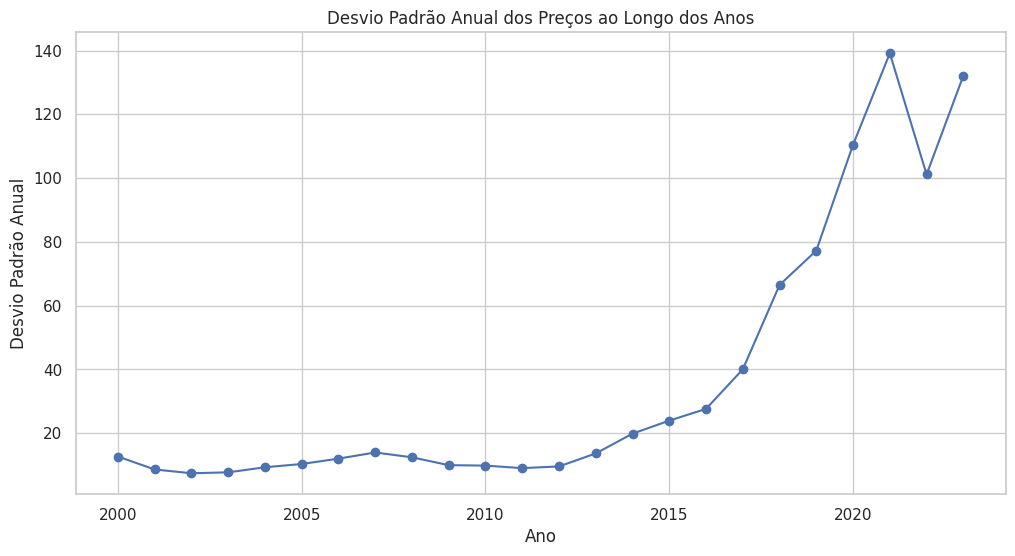

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

desvio_padrao_anual = {}

# Itere pelos anos e calcule o desvio padrão para cada ano
for year in range(df_copia['Date'].dt.year.min(), df_copia['Date'].dt.year.max() + 1):
    year_data = df_copia[df_copia['Date'].dt.year == year]
    desvio_padrao_anual[year] = year_data['Close'].std()

# Converta o dicionário em uma série
desvio_padrao_anual_series = pd.Series(desvio_padrao_anual)

# Create a line plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(desvio_padrao_anual_series.index, desvio_padrao_anual_series.values, marker='o')
plt.xlabel('Ano')
plt.ylabel('Desvio Padrão Anual')
plt.title('Desvio Padrão Anual dos Preços ao Longo dos Anos')
plt.grid(True)
plt.show()



In [ ]:
inicio_periodo1 = 2000
fim_periodo1 = 2016
inicio_periodo2 = 2017

# Converta os valores do dicionário em um array NumPy
valores = np.array(list(desvio_padrao_anual.values()))

# Crie um array de anos correspondente aos valores
anos = np.array(list(desvio_padrao_anual.keys()))

# Use NumPy para calcular as médias dos dois períodos
media_periodo1 = np.mean(valores[(anos >= inicio_periodo1) & (anos <= fim_periodo1)])
media_periodo2 = np.mean(valores[anos >= inicio_periodo2])

print(f'Média de {inicio_periodo1}-{fim_periodo1}: {media_periodo1}')
print(f'Média de {inicio_periodo2}-até o presente: {media_periodo2}')

Média de 2000-2016: 12.852344175158851
Média de 2017-até o presente: 95.23412116606546


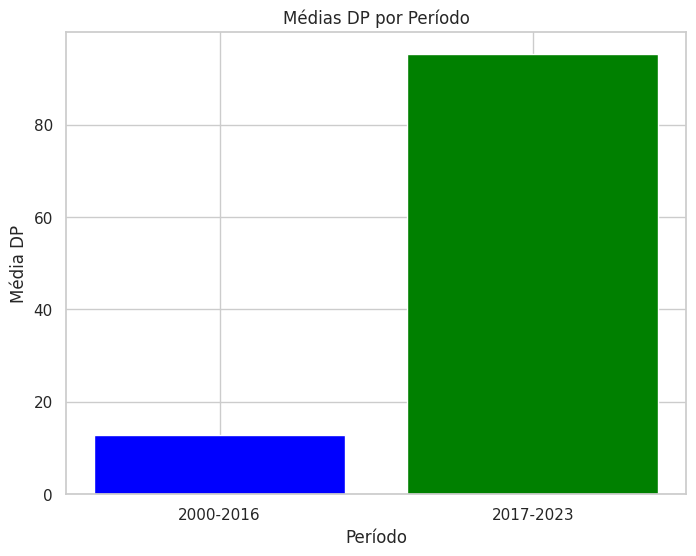

In [ ]:
plt.figure(figsize=(8, 6))
periodos = ['2000-2016', '2017-2023']
medias = [media_periodo1, media_periodo2]
plt.bar(periodos, medias, color=['blue', 'green'])
plt.xlabel('Período')
plt.ylabel('Média DP')
plt.title('Médias DP por Período')
plt.show()

## Heatmap

Text(0.5, 1.0, 'Correlation heatmap')

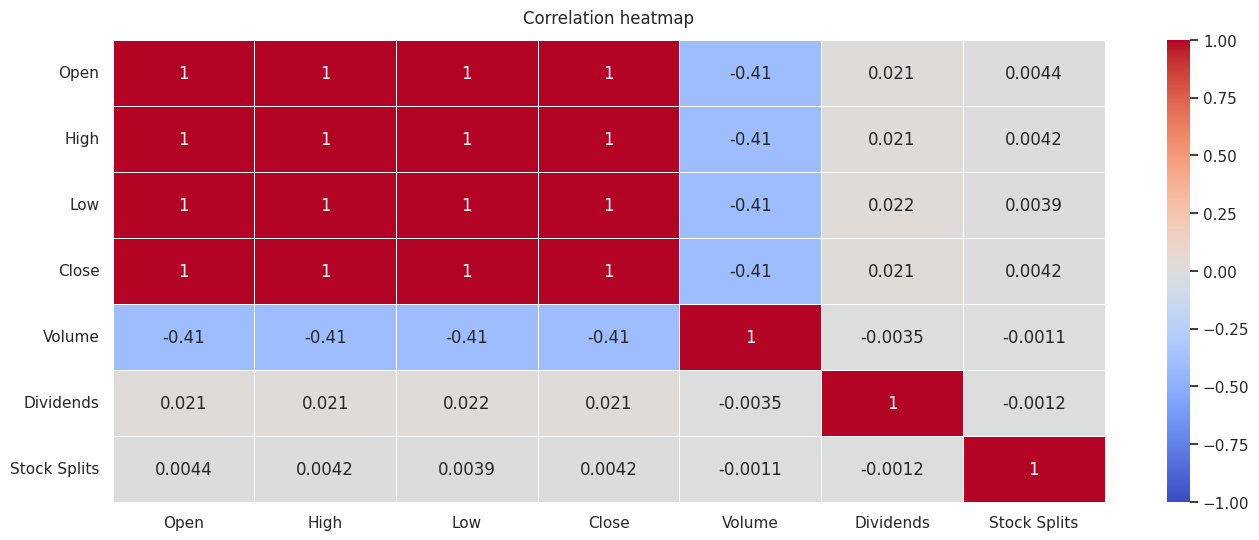

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(sample.corr(numeric_only = True), cmap='coolwarm', vmin=-1, vmax=1, annot=True, linewidth=.5)
heatmap.set_title('Correlation heatmap', pad=12)

## Regressão linear

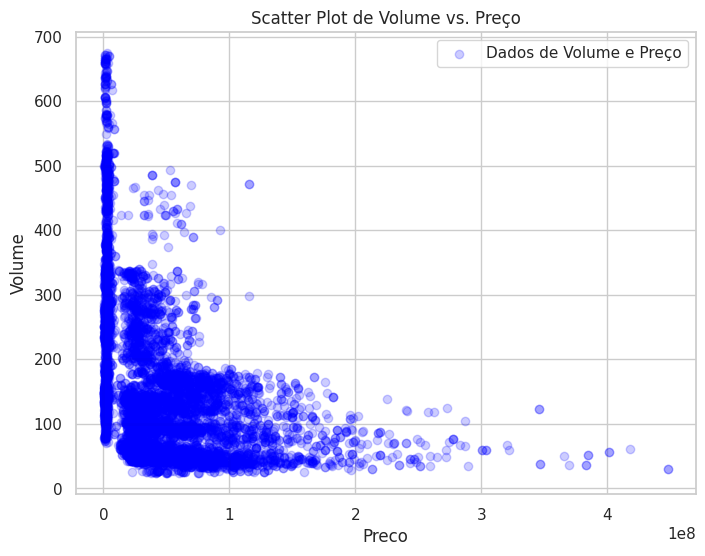

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Volume'], df['Close'], c='blue', marker='o', label='Dados de Volume e Preço', alpha=0.2)

plt.xlabel('Preco')
plt.ylabel('Volume')

plt.title('Scatter Plot de Volume vs. Preço')

plt.legend()

plt.grid(True)
plt.show()

In [ ]:
model = LinearRegression()

X = sample[['Close']]  # Variável independente
Y = sample['Volume']  # Variável dependente
model.fit(X, Y)

predictions = model.predict(X)

r2 = r2_score(Y, predictions)
mse = mean_squared_error(Y, predictions)
mae = mean_absolute_error(Y, predictions)

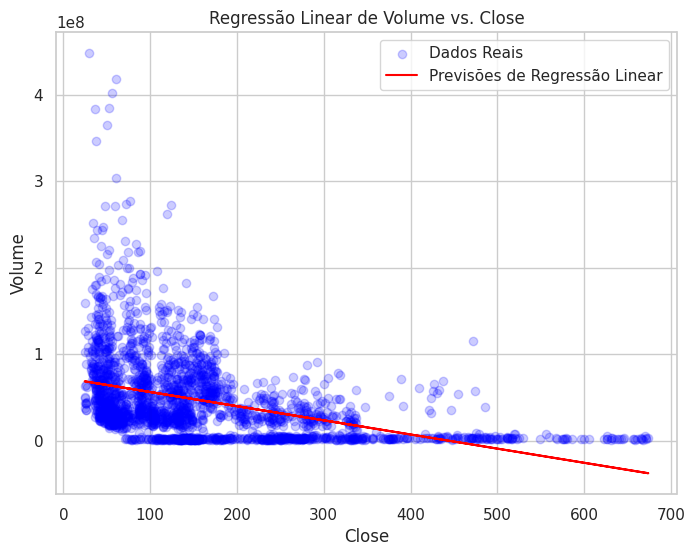

O coeficiente de determinação (R²) = 0.16855
O erro quadrático médio (MSE) = 1981034639365920.75000
O erro absoluto médio = 31680383.39625


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(sample['Close'], sample['Volume'], c='blue', marker='o', label='Dados Reais', alpha=0.2)
plt.plot(sample['Close'], predictions, c='red', label='Previsões de Regressão Linear')

plt.xlabel('Close')
plt.ylabel('Volume')

plt.title('Regressão Linear de Volume vs. Close')

plt.legend()

plt.grid(True)
plt.show()

print(f'''O coeficiente de determinação (R²) = {r2:.5f}
O erro quadrático médio (MSE) = {mse:.5f}
O erro absoluto médio = {mae:.5f}''')

É importante considerar o contexto dos dados e a relação entre as variáveis ao interpretar a inclinação da linha de regressão. Se não faz sentido que os valores reais sejam negativos em seu contexto, pode ser necessário considerar outros modelos de regressão ou fatores que influenciam a relação entre as variáveis.

### Comparando com a parte de validação



In [ ]:
class Result:
  def __init__(self, mae, mse, r2):
    self.mae = mae
    self.mse = mse
    self.r2 = r2

In [ ]:
def print_comparison(train, validation, *metrics):
  for metric in metrics:
    train_result = getattr(train, metric)
    validation_result = getattr(validation, metric)
    print(f"{metric.upper()} da amostra de treinamento: {train_result:.5f}")
    print(f"{metric.upper()} da amostra de validação: {validation_result:.5f}")

    difference_percentage = abs((train_result - validation_result) / train_result) * 100
    print(f"Diferença entre treinamento e validação: {difference_percentage:.2f}%\n")

In [ ]:
def get_all_metrics(data, predictions):
  mse = mean_squared_error(data, predictions)
  mae = mean_absolute_error(data, predictions)
  r2 = r2_score(data, predictions)
  return [mae, mse, r2]

In [ ]:
model = LinearRegression()

X_train = sample[['Close']]  # Variável independente da amostra de treinamento
Y_train = sample['Volume']  # Variável dependente da amostra de treinamento
model.fit(X_train, Y_train)
predictions_train = model.predict(X_train)

X_validation = teste[['Close']]  # Variável independente da amostra de validação
Y_validation = teste['Volume']  # Variável dependente da amostra de validação
model.fit(X_validation, Y_validation)
predictions_validation = model.predict(X_validation)

train_results = Result(*get_all_metrics(Y_train, predictions_train))
validation_results = Result(*get_all_metrics(Y_validation, predictions_validation))

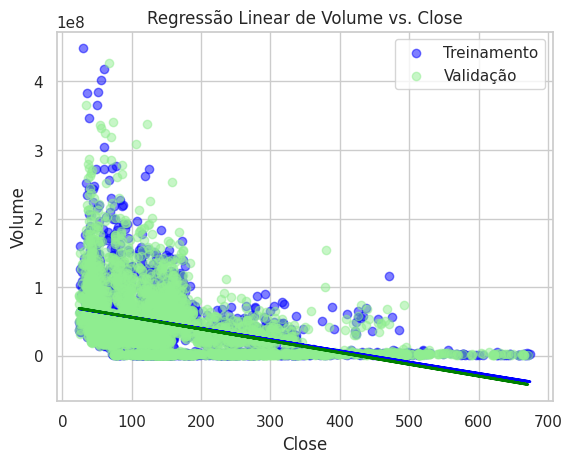

MAE da amostra de treinamento: 31680383.39625
MAE da amostra de validação: 31070264.65286
Diferença entre treinamento e validação: 1.93%

MSE da amostra de treinamento: 1981034639365920.75000
MSE da amostra de validação: 1853900709364073.25000
Diferença entre treinamento e validação: 6.42%

R2 da amostra de treinamento: 0.16855
R2 da amostra de validação: 0.18674
Diferença entre treinamento e validação: 10.79%



In [ ]:
plt.scatter(sample['Close'], sample['Volume'], c='blue', marker='o', label='Treinamento', alpha=0.5)
plt.plot(sample['Close'], predictions_train, c='blue', label='_nolegend_', linewidth=2)

plt.scatter(teste['Close'], teste['Volume'], c='lightgreen', marker='o', label='Validação', alpha=0.5)
plt.plot(teste['Close'], predictions_validation, c='green', label='_nolegend_', linewidth=2)

plt.xlabel('Close')
plt.ylabel('Volume')

plt.title('Regressão Linear de Volume vs. Close')

plt.legend()

plt.grid(True)
plt.show()

print_comparison(train_results, validation_results, 'mae', 'mse', 'r2')

## Testes de Hipótese

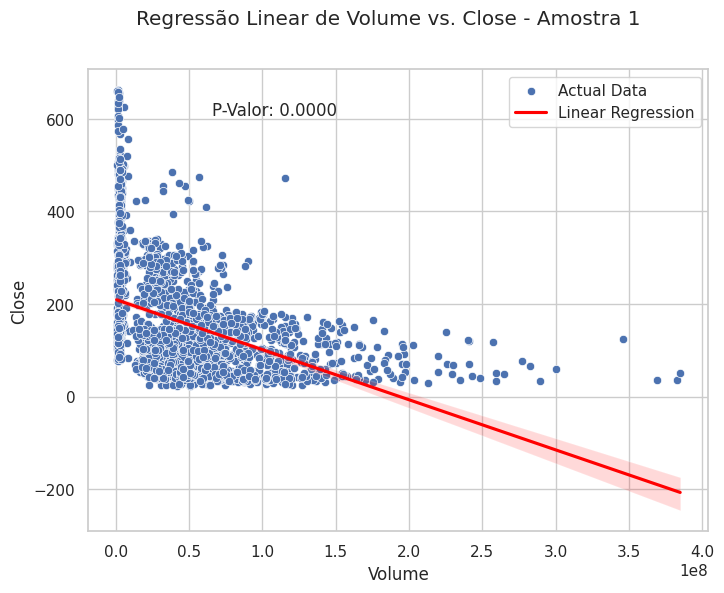

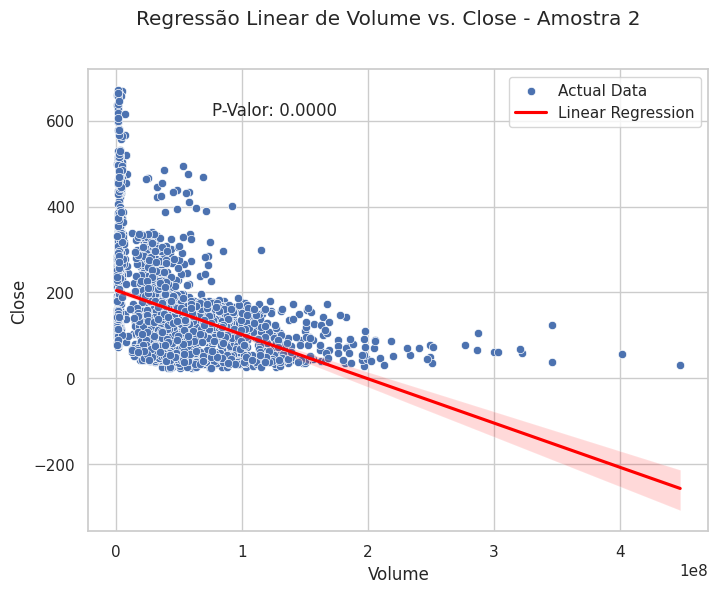

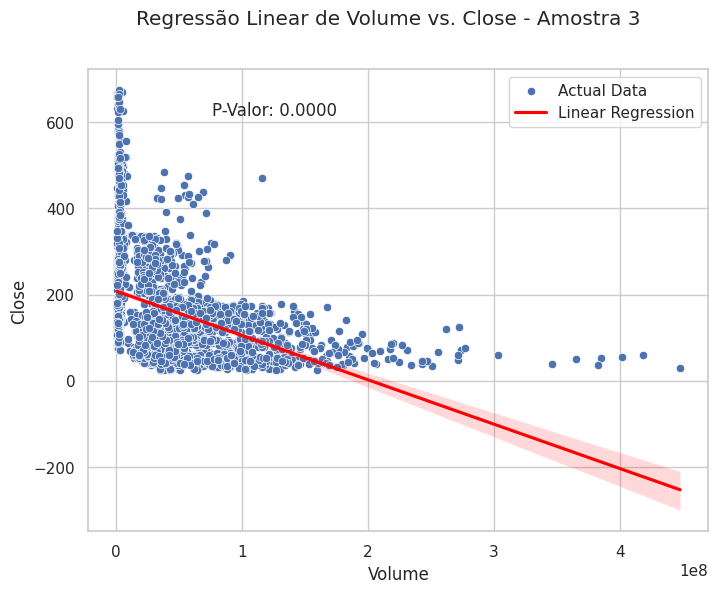

In [ ]:
warnings.filterwarnings('ignore')

for i, sample in enumerate(sample_list):
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.suptitle(f'Regressão Linear de Volume vs. Close - Amostra {i + 1}')

    # Realize a regressão linear
    X = sm.add_constant(sample['Volume'])  # Adicione uma constante (intercepto)
    model = sm.OLS(sample['Close'], X).fit()

    # Extraia o coeficiente de inclinação e o p-valor associado
    slope = model.params['Volume']
    p_value = model.pvalues['Volume']

    # Crie um scatter com linha de regressão dos dados reais
    sns.scatterplot(x='Volume', y='Close', data=sample, label='Actual Data')

    sns.regplot(x='Volume', y='Close', data=sample, scatter=False, color='red', label='Linear Regression')

    # Adicione informações sobre a regressão
    ax.annotate(f'P-Valor: {p_value:.4f}', xy=(0.2, 0.9), xycoords='axes fraction', fontsize=12)

    ax.set(xlabel='Volume', ylabel='Close')

    ax.legend()

    plt.grid(True)

plt.show()

In [ ]:
X = sm.add_constant(sample['Volume'])
model = sm.OLS(sample['Close'], X).fit()

print(model.summary())

slope = model.params['Volume']
p_value = model.pvalues['Volume']

if p_value < 0.05:
    print(f'\nRejeitamos a hipótese nula. Existe uma relação significativa entre Volume e Close (p-valor = {p_value}).')
else:
    print(f'\nNão rejeitamos a hipótese nula. Não há evidência de uma relação significativa entre Volume e Close (p-valor = {p_value}).')

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     487.7
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.44e-98
Time:                        12:52:19   Log-Likelihood:                -14772.
No. Observations:                2408   AIC:                         2.955e+04
Df Residuals:                    2406   BIC:                         2.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.2375      3.135     66.422      0.0

In [ ]:
X2 = sample[['Close', 'Dividends', 'Open', 'Low', 'High']]
Y2 = sample['Volume']

X2 = sm.add_constant(X2)

model2 = sm.OLS(Y2, X2).fit()

f_statistic = model2.fvalue
p_value = model2.f_pvalue

if f_statistic > model2.f_pvalue and p_value < 0.05:
    print("Rejeitamos a hipótese nula: Há evidências de que pelo menos um coeficiente é não nulo, o que indica que o modelo é globalmente significante.")
    print("Coeficientes significativos:")
    print(model2.summary())
else:
    print("Não rejeitamos a hipótese nula: Não há evidências de que pelo menos um coeficiente é não nulo, o que sugere que o modelo pode não ser globalmente significante.")

Rejeitamos a hipótese nula: Há evidências de que pelo menos um coeficiente é não nulo, o que indica que o modelo é globalmente significante.
Coeficientes significativos:
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     100.7
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.37e-96
Time:                        12:52:19   Log-Likelihood:                -45818.
No. Observations:                2408   AIC:                         9.165e+04
Df Residuals:                    2402   BIC:                         9.168e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

***Texto do chat para entender os resultados***

Os resultados indicam que você rejeitou a hipótese nula, o que significa que o modelo é globalmente significante, ou seja, pelo menos uma das variáveis independentes tem um efeito significativo sobre a variável dependente 'Volume'.

Aqui estão algumas observações importantes sobre os resultados:

R-squared (R²): O valor de R-squared é 0.171, o que indica que aproximadamente 17.1% da variabilidade em 'Volume' pode ser explicada pelas variáveis independentes ('Close', 'Dividends', 'Open', 'Low' e 'High'). Isso sugere que o modelo não é muito eficaz em explicar a variação em 'Volume'.

Coeficientes: Os coeficientes para cada variável independente são listados. O coeficiente para 'Close' tem um valor de -9.324e+05, mas seu p-valor é 0.086, indicando que ele não é estatisticamente significativo a um nível de significância de 0.05. Isso sugere que 'Close' pode não ter um efeito significativo em 'Volume'. Da mesma forma, os coeficientes para 'Dividends', 'Open', 'Low' e 'High' também não são estatisticamente significativos.

F-statistic: O valor do F-statistic é 98.92, e o p-valor associado a ele é 4.85e-95. O F-statistic é usado para testar a significância global do modelo, e o baixo valor do p-valor (muito próximo de zero) indica que o modelo é globalmente significante.

P>|t|: Os valores de P>|t| mostram os p-valores para cada coeficiente individual. Se o p-valor for menor que o nível de significância (alfa) definido (0.05), o coeficiente é considerado estatisticamente significativo. Neste caso, nenhum dos coeficientes é estatisticamente significativo.

Multicolinearidade: A nota no final dos resultados indica que pode haver multicolinearidade entre as variáveis independentes. Isso significa que algumas variáveis independentes podem estar altamente correlacionadas entre si, o que pode afetar a interpretação dos coeficientes. É importante verificar a multicolinearidade em seu modelo.

Portanto, com base nos resultados, o modelo global é significante, mas nenhuma das variáveis independentes ('Close', 'Dividends', 'Open', 'Low', 'High') é estatisticamente significativa em relação a 'Volume'. Isso sugere que o modelo pode não ser eficaz em explicar as variações em 'Volume' com base nessas variáveis independentes.

In [ ]:
model = LinearRegression()

model.fit(X2, Y2)

predictions = model.predict(X2)

r2 = r2_score(Y2, predictions)

print(f"Coeficiente de Ajuste do Modelo (R²): {r2:.5f}", )

Coeficiente de Ajuste do Modelo (R²): 0.17323



***Texto do chat para entender os resultados***

O coeficiente de ajuste do modelo (R²) é uma medida que indica a proporção da variabilidade na variável de resposta (nesse caso, 'Volume') que é explicada pelas variáveis independentes ('Close', 'Dividends', 'Open', 'Low', 'High') no modelo de regressão. O valor do R² varia entre 0 e 1, e sua interpretação é a seguinte:

R² próximo a 1: Isso indica que as variáveis independentes explicam uma grande parte da variabilidade na variável de resposta, ou seja, o modelo se ajusta bem aos dados. Nesse contexto, um R² alto sugeriria que as variáveis independentes são boas preditoras de 'Volume'.

R² próximo a 0: Isso indica que as variáveis independentes têm pouco poder de explicação sobre a variável de resposta, e o modelo não se ajusta bem aos dados.

Portanto, ao interpretar o resultado do R², você deve considerar que um R² mais alto é desejável, pois sugere que as variáveis independentes estão fornecendo informações significativas para prever 'Volume'. No entanto, um R² baixo não significa necessariamente que o modelo seja inútil; ele pode indicar que outras variáveis não incluídas no modelo podem ser importantes para explicar a variabilidade em 'Volume'.

No seu contexto, o valor específico de R² informa o quanto o modelo de regressão com as variáveis independentes dadas está explicando a variação em 'Volume'. Um R² de 0.171, como mencionado anteriormente, sugere que cerca de 17.1% da variação em 'Volume' é explicada pelas variáveis independentes do modelo. Isso indica que o modelo atual não é muito eficaz em explicar 'Volume' com base nas variáveis independentes fornecidas. Portanto, pode ser necessário considerar outras variáveis ou métodos de modelagem para melhorar a previsão de 'Volume'.

In [ ]:
import statsmodels.api as sm

# Variáveis dependentes e independentes
dependent_vars = ['Close', 'Dividends', 'Open', 'Low', 'High', 'Volume']
independent_vars = ['Close', 'Dividends', 'Open', 'Low', 'High', 'Volume']

for dependent_var in dependent_vars:
    Y3 = sample[dependent_var]
    X3 = sample[independent_vars]

    X3 = sm.add_constant(X3)  # Adicione uma constante (intercepto)

    model3 = sm.OLS(Y3, X3).fit()

    # Imprima um resumo dos resultados para cada análise de regressão múltipla
    print(f"Análise de Regressão Múltipla para {dependent_var}:")
    print(model3.summary())
    print("\n")

Análise de Regressão Múltipla para Close:
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.239e+22
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:52:19   Log-Likelihood:                 39753.
No. Observations:                2408   AIC:                        -7.949e+04
Df Residuals:                    2401   BIC:                        -7.945e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [ ]:
errors = Y - predictions

squared_errors = errors ** 2

mse = np.mean(squared_errors)
mae = np.sqrt(mse)

print(f"Erro Quadrático Médio (MSE): {mse:.5f}")
print(f"O erro médio absoluto (MAE): {mae:.5f}")

Erro Quadrático Médio (MSE): 1969888846026304.25000
O erro médio absoluto (MAE): 44383429.85875


## Regressão Polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = sample[['Close']].values  # Variável independente
Y = sample['Volume'].values  # Variável dependente

In [ ]:
def polinomial_regression(degree):
  # Crie as características polinomiais
  poly = PolynomialFeatures(degree=degree)
  X_poly = poly.fit_transform(X)
  regressor = LinearRegression()

  # Ajuste o modelo de regressão linear aos dados polinomiais
  regressor.fit(X_poly, Y)

  # Previsões com base nos dados polinomiais
  predictions = regressor.predict(X_poly)

  # Plote os dados reais e as previsões
  plt.figure(figsize=(8, 6))
  plt.scatter(X, Y, c='blue', marker='o', label='Dados Reais')
  plt.plot(X, predictions, c='red', label=f'Regressão Polinomial (grau {degree})')

  # Adicione rótulos aos eixos
  plt.xlabel('Close')
  plt.ylabel('Volume')

  # Adicione um título ao gráfico
  plt.title(f'Regressão Polinomial (grau {degree}) de Volume vs. Close')

  # Adicione uma legenda
  plt.legend()

  # Mostre o gráfico
  plt.grid(True)
  plt.show()

  # Calcule o erro quadrático médio (MSE) das previsões
  # Suponha que você já tenha ajustado o modelo aos dados de treinamento
  r2 = r2_score(Y, predictions)
  print(f"Coeficiente de Determinação (R²): {r2:.5f}")
  mse = mean_squared_error(Y, predictions)
  print(f"Erro Quadrático Médio (MSE): {mse:.5f}")

  return r2, mse

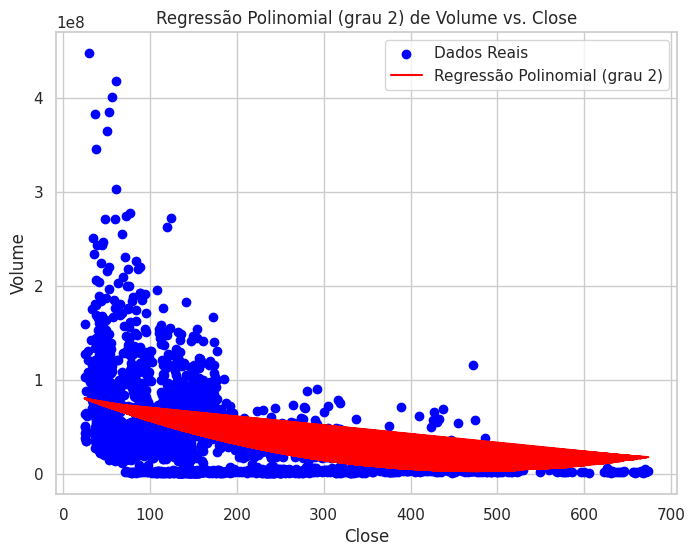

Coeficiente de Determinação (R²): 0.19813
Erro Quadrático Médio (MSE): 1910562933059632.50000


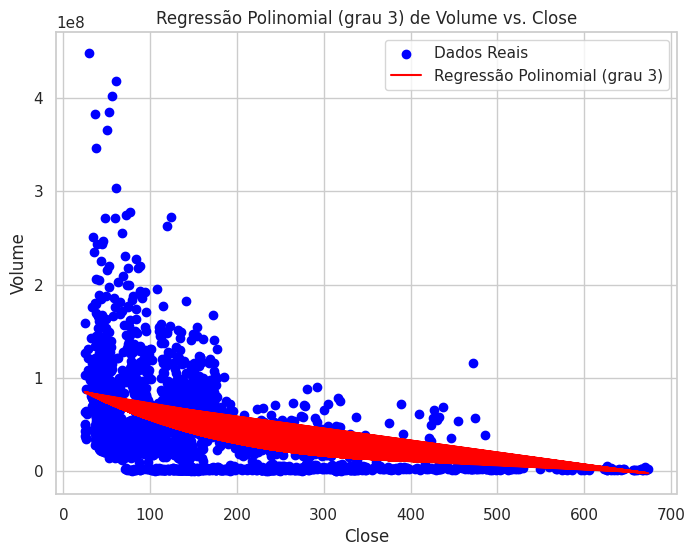

Coeficiente de Determinação (R²): 0.20139
Erro Quadrático Médio (MSE): 1902802204715962.25000


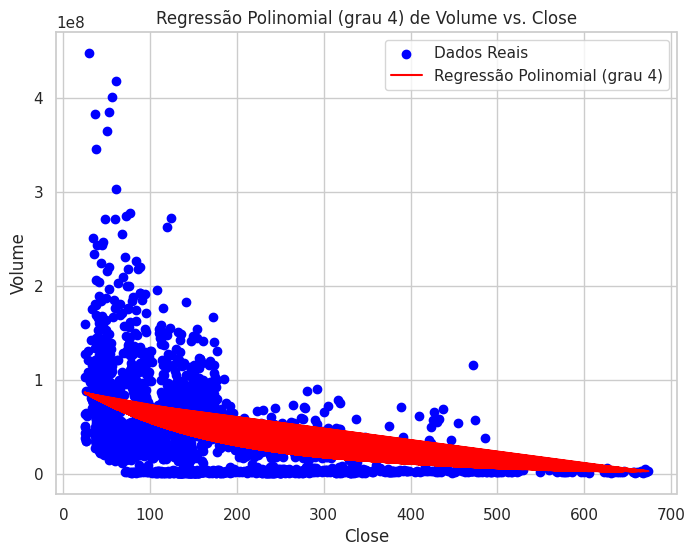

Coeficiente de Determinação (R²): 0.20161
Erro Quadrático Médio (MSE): 1902279502992326.50000


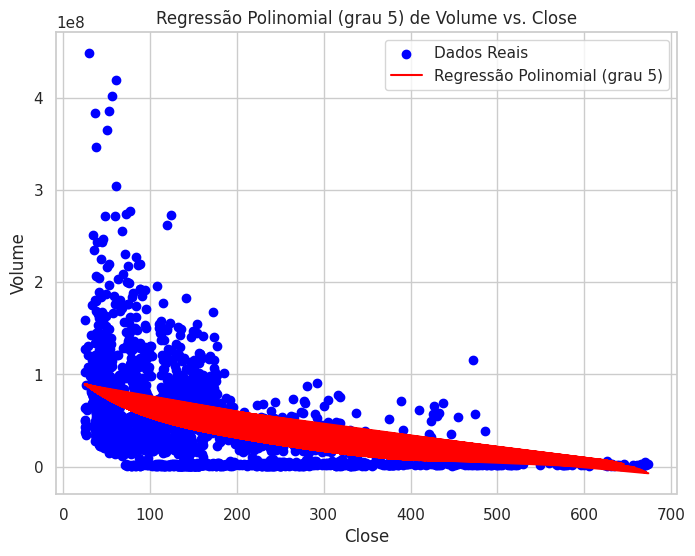

Coeficiente de Determinação (R²): 0.20230
Erro Quadrático Médio (MSE): 1900630449725799.75000


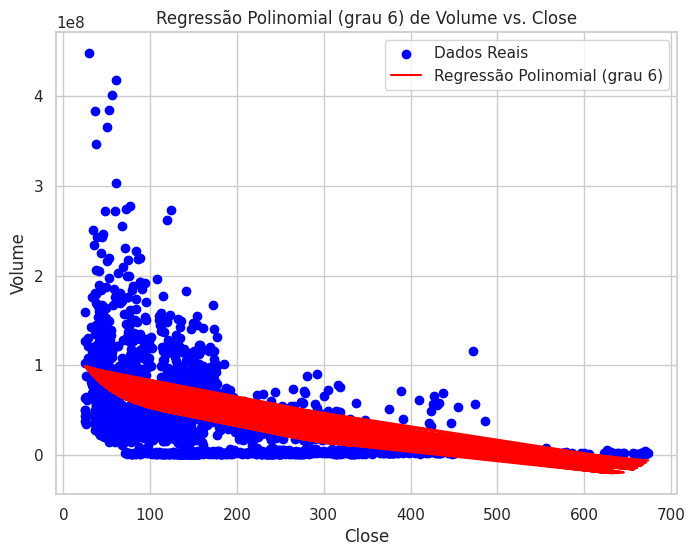

Coeficiente de Determinação (R²): 0.20332
Erro Quadrático Médio (MSE): 1898186719698748.75000


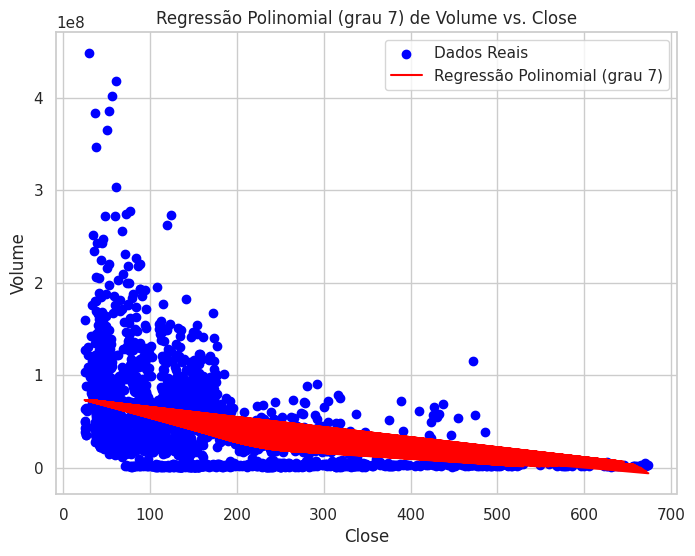

Coeficiente de Determinação (R²): 0.19302
Erro Quadrático Médio (MSE): 1922737681411650.25000


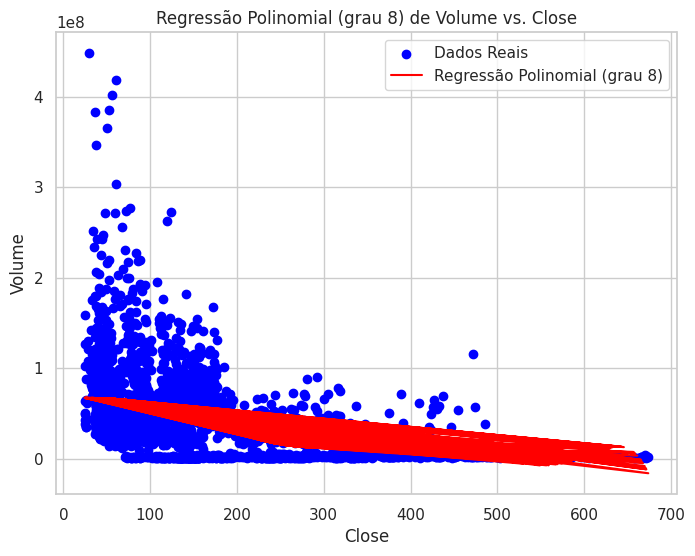

Coeficiente de Determinação (R²): 0.18341
Erro Quadrático Médio (MSE): 1945634603042518.25000


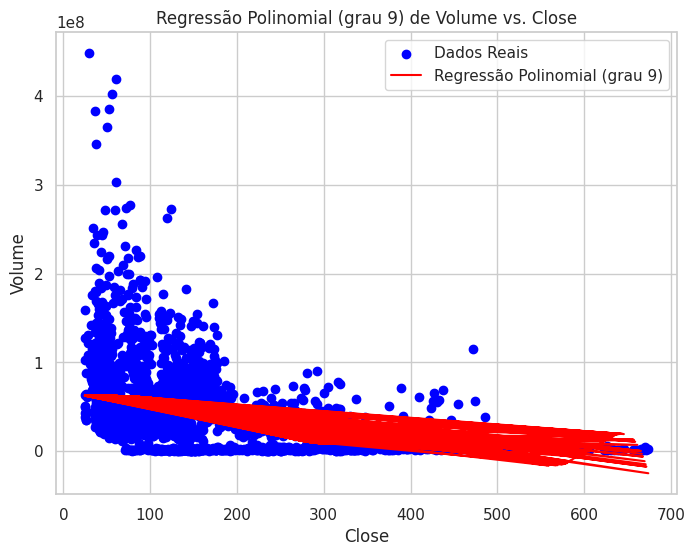

Coeficiente de Determinação (R²): 0.16863
Erro Quadrático Médio (MSE): 1980845514624865.50000


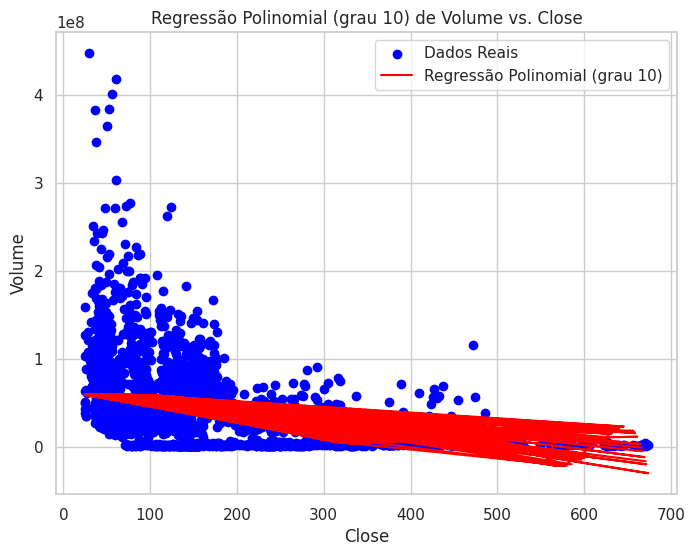

Coeficiente de Determinação (R²): 0.15186
Erro Quadrático Médio (MSE): 2020807034004486.50000


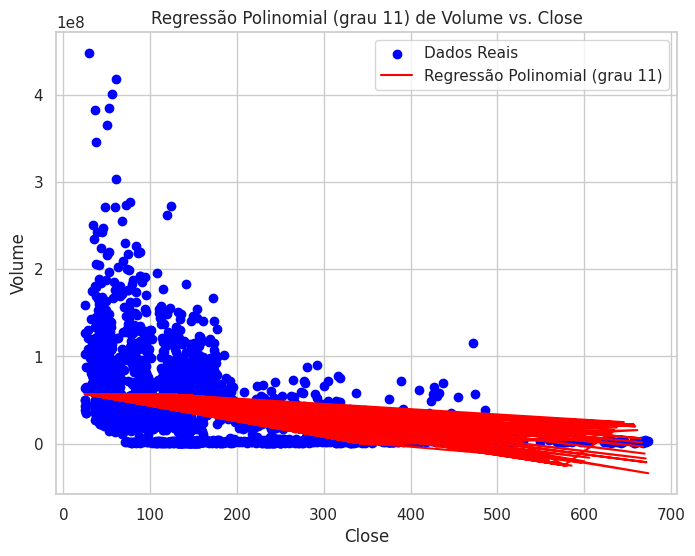

Coeficiente de Determinação (R²): 0.13523
Erro Quadrático Médio (MSE): 2060421217633333.25000


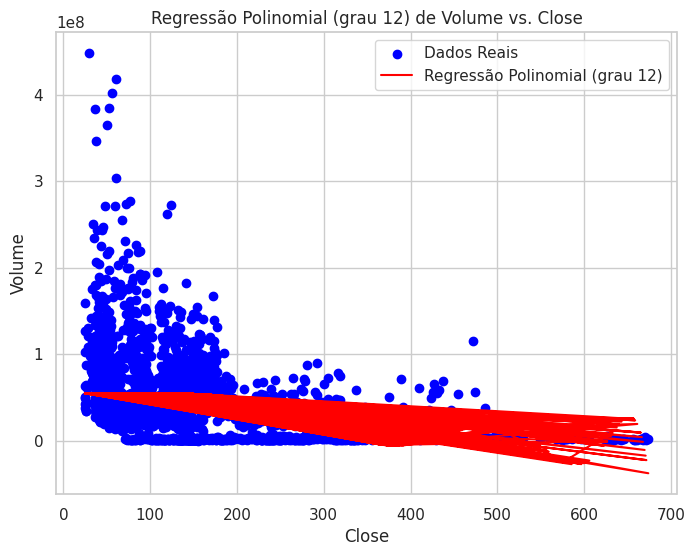

Coeficiente de Determinação (R²): 0.11905
Erro Quadrático Médio (MSE): 2098976171415078.25000


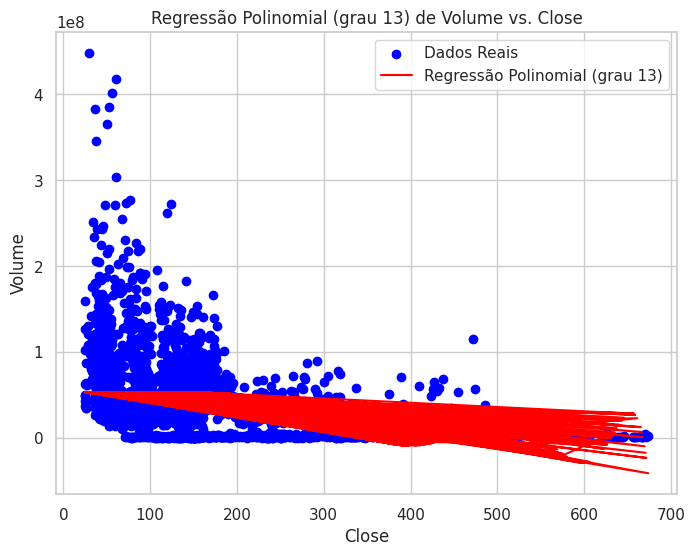

Coeficiente de Determinação (R²): 0.10348
Erro Quadrático Médio (MSE): 2136066019969078.50000


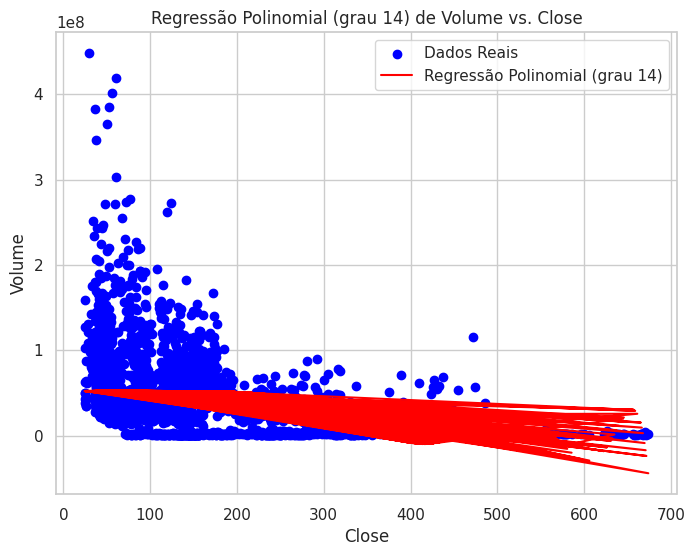

Coeficiente de Determinação (R²): 0.08906
Erro Quadrático Médio (MSE): 2170424144073995.00000


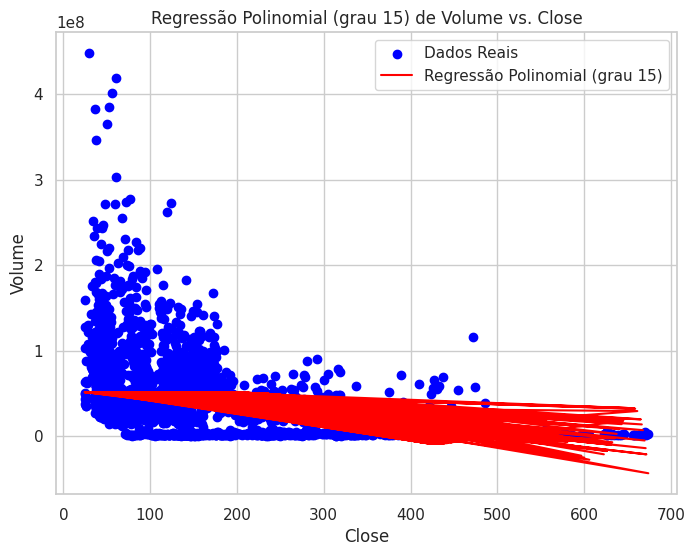

Coeficiente de Determinação (R²): 0.07648
Erro Quadrático Médio (MSE): 2200411983913410.00000


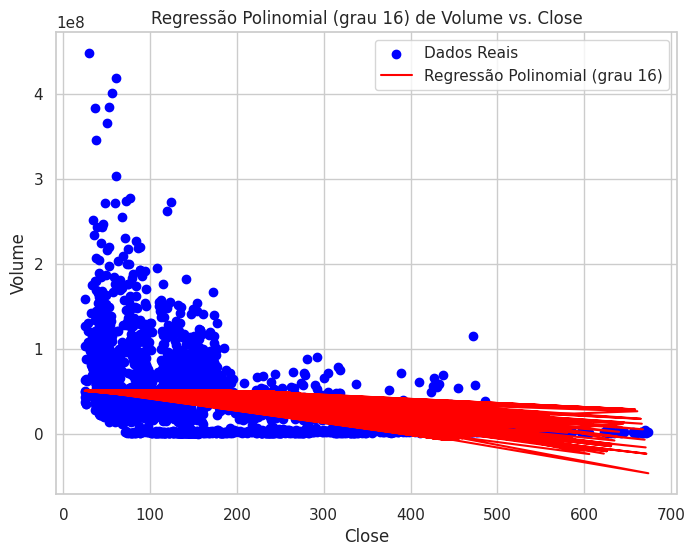

Coeficiente de Determinação (R²): 0.06619
Erro Quadrático Médio (MSE): 2224913872168977.50000


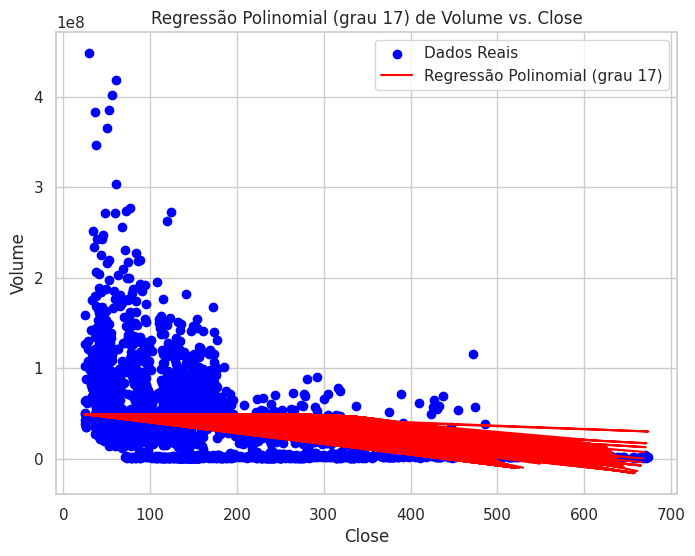

Coeficiente de Determinação (R²): 0.04301
Erro Quadrático Médio (MSE): 2280151922137097.50000


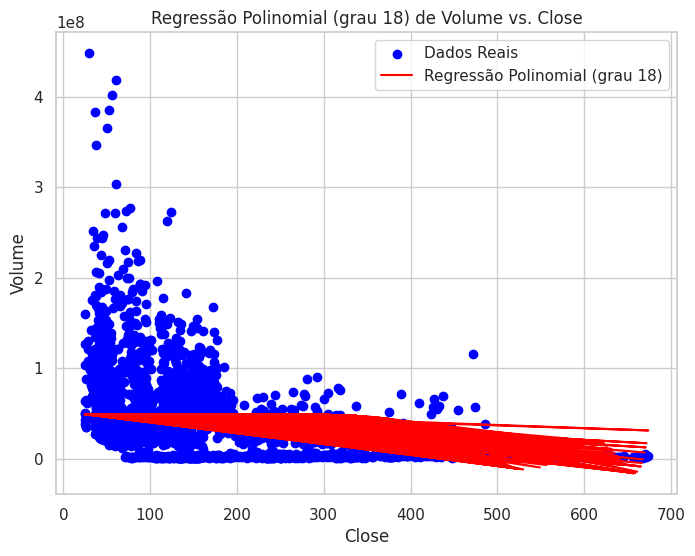

Coeficiente de Determinação (R²): 0.04048
Erro Quadrático Médio (MSE): 2286188056089716.50000


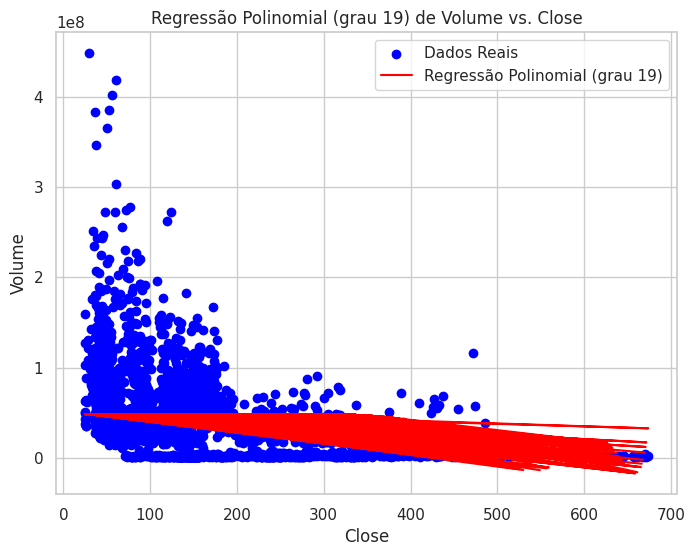

Coeficiente de Determinação (R²): 0.03828
Erro Quadrático Médio (MSE): 2291428113287847.50000


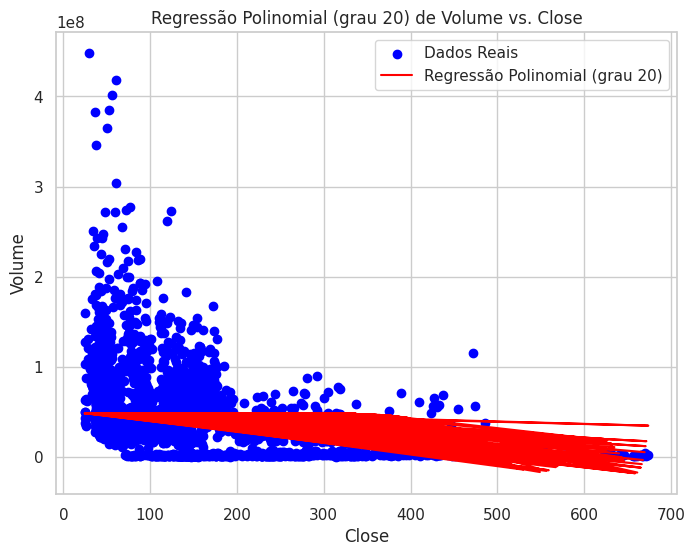

Coeficiente de Determinação (R²): 0.03626
Erro Quadrático Médio (MSE): 2296246601010350.50000


In [ ]:
best_r2 = (0, 0)
best_mse = (0, 0)
for i in range(2, 21):
  r2, mse = polinomial_regression(i)

  if r2 > best_r2[1]:
    best_r2 = (i, r2)

  if i == 2:
    best_mse = (i, mse)
  elif mse < best_mse[1]:
    best_mse = (i, mse)

In [ ]:
print(f'Melhor MSE: grau {best_mse[0]}, MSE: {best_mse[1]}')
print(f'Melhor R²: grau {best_r2[0]}, R²: {best_r2[1]}')

Melhor MSE: grau 6, MSE: 1898186719698748.8
Melhor R²: grau 6, R²: 0.20332297142928468


## Regressão Logística

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Create a hypothetical dataset
#data = {
#    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
#    'Open': [100, 102, 105, 103],
#    'High': [105, 108, 110, 106],
#    'Low': [99, 101, 103, 100],
#    'Close': [104, 107, 108, 102],
#    'Volume': [10000, 12000, 11000, 9000],
#    'Brand_Name': ['Brand1', 'Brand2', 'Brand1', 'Brand2'],
#    'Ticker': ['TICK1', 'TICK2', 'TICK1', 'TICK2'],
#    'Industry_Tag': ['Tech', 'Finance', 'Tech', 'Finance'],
#    'Country': ['USA', 'USA', 'Canada', 'Canada'],
#    'Price_Increase': [1, 1, 0, 0]  # 1 for price increase, 0 for price decrease
#}
#
## Create a DataFrame
#df = pd.DataFrame(data)
#
## Split the data into features (X) and target variable (y)
#X = df[['Open', 'High', 'Low', 'Close']]
#y = df['Price_Increase']
#
## Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#
## Create and train a logistic regression model
#model = LogisticRegression()
#model.fit(X_train, y_train)
#
## Make predictions
#y_pred = model.predict(X_test)
#
## Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#confusion = confusion_matrix(y_test, y_pred)
#
#print("Accuracy:", accuracy)
#print("Confusion Matrix:\n", confusion)
#

In [ ]:
# Crie um DataFrame
df = pd.DataFrame(df)

# Converta a coluna 'Date' em um tipo de dados datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ordene o DataFrame por 'Date'
df = df.sort_values(by='Date')

# Adicione uma coluna 'price_increase' que indica se o preço de fechamento é maior do que o do mês anterior
df['price_increase'] = df.groupby('Ticker')['Close'].diff() > 0

# Preencha os valores NA (primeira linha de cada empresa) com False, pois não há mês anterior para comparar
df['price_increase'] = df['price_increase'].fillna(False)

# Exiba o DataFrame resultante
print(df)

                                      Date        Open        High  \
Sample 2 174348  2017-01-03 00:00:00-05:00  103.430000  104.029999   
Sample 1 174348  2017-01-03 00:00:00-05:00  103.430000  104.029999   
Sample 3 64565   2017-01-03 00:00:00-05:00   57.446836   57.492581   
Sample 2 22781   2017-01-03 00:00:00-05:00   26.977767   27.101240   
Sample 1 22781   2017-01-03 00:00:00-05:00   26.977767   27.101240   
...                                    ...         ...         ...   
         73      2023-09-08 00:00:00-04:00  330.089996  336.160004   
Sample 2 62      2023-09-08 00:00:00-04:00  136.860001  138.850006   
Sample 1 19      2023-09-08 00:00:00-04:00  459.420013  466.059998   
Sample 3 7       2023-09-08 00:00:00-04:00  134.910004  136.649994   
Sample 1 14      2023-09-08 00:00:00-04:00  330.089996  336.160004   

                        Low       Close       Volume  Dividends  Stock Splits  \
Sample 2 174348  102.809998  103.480003    2277400.0        0.0           0.0 

In [ ]:
df['price_increase'].value_counts()

False    4302
True     2922
Name: price_increase, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Divida os dados em recursos (X) e alvo (y)
X = df[['Close']]
y = df['price_increase']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialize o modelo de regressão logística
model = LogisticRegression()

# Treine o modelo no conjunto de treinamento
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(classification_rep)


Acurácia: 0.5889273356401384
Matriz de Confusão:
[[851   0]
 [594   0]]
Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.59      1.00      0.74       851
        True       0.00      0.00      0.00       594

    accuracy                           0.59      1445
   macro avg       0.29      0.50      0.37      1445
weighted avg       0.35      0.59      0.44      1445



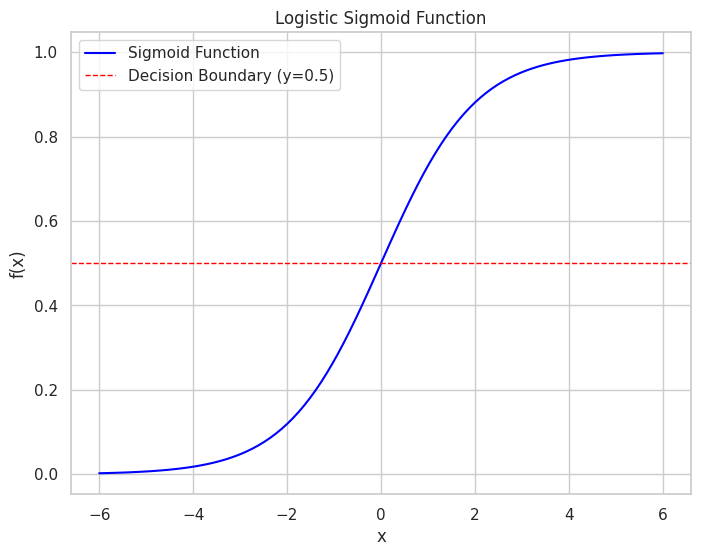

In [ ]:

# Define the sigmoid (logistic) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of x values
x = np.linspace(-6, 6, 100)

# Calculate corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.title('Logistic Sigmoid Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='Decision Boundary (y=0.5)')
plt.legend()
plt.show()

Acurácia do modelo de regressão logística: 0.59


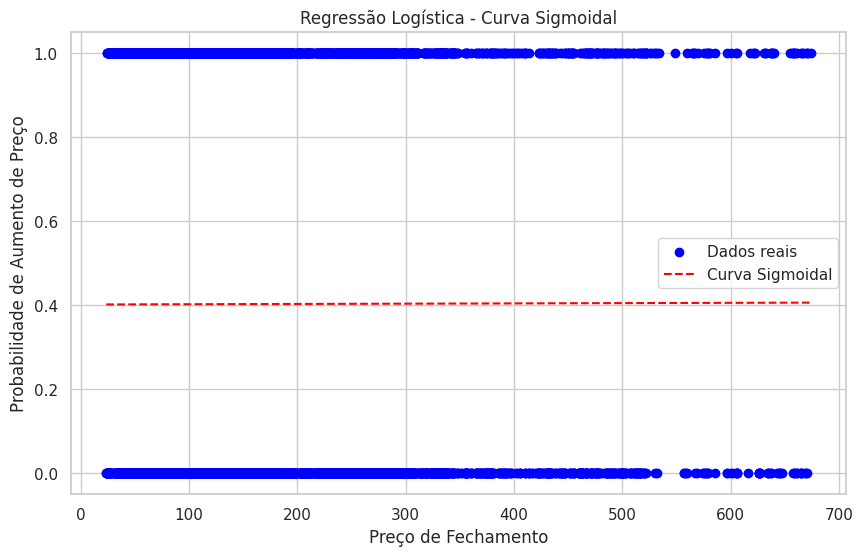

In [ ]:

# Crie um novo DataFrame apenas com as colunas relevantes para a regressão logística
df_logistic = df[['Close', 'price_increase']]

# Divida os dados em treinamento e teste
X = df_logistic[['Close']]
y = df_logistic['price_increase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine um modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcule a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo de regressão logística: {accuracy:.2f}")

# Plotar a curva sigmoidal
x_values = np.linspace(X['Close'].min(), X['Close'].max(), 100)
y_values = 1 / (1 + np.exp(-model.coef_ * x_values - model.intercept_))

plt.figure(figsize=(10, 6))
plt.scatter(X['Close'], y, color='blue', label='Dados reais')
plt.plot(x_values, y_values[0], color='red', linestyle='--', label='Curva Sigmoidal')
plt.title('Regressão Logística - Curva Sigmoidal')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Probabilidade de Aumento de Preço')
plt.legend()
plt.grid(True)

# Exiba o gráfico
plt.show()